In [13]:
# install and import condalab, run twice.
!pip install -q condacolab -q
import condacolab
condacolab.install()

# install geopandas, this could take long
!conda install geopandas
import geopandas as gpd

✨🍰✨ Everything looks OK!
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.



In [14]:
# for download and decompress the dataset
import os, zipfile, glob, io, requests

# for SIG and spatial info management
from shapely.geometry import Polygon, shape

# for SIG and spatial visualization
import folium
from folium import Choropleth
from folium.plugins import HeatMap

# for dataframes and numerical info management
import numpy as np
import pandas as pd

# for plot and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# for dependencies
%matplotlib inline

In [15]:
# fetching from the repo
! wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

# importing the data
world_df = gpd.read_file("/content/ne_110m_admin_0_countries.zip")
world_df.to_crs(epsg=4326, inplace=True)

# also the dataset is huge (162 features), so it need cleaning.
world_df = world_df[['CONTINENT','NAME_LONG', 'POP_EST', 'POP_YEAR', 'geometry']]
world_df.columns = world_df.columns.str.lower()

# features for plot
world_df['centroid'] = world_df.geometry.centroid # adding centroid for plotting names in the map

--2022-03-31 15:03:43--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip [following]
--2022-03-31 15:03:43--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 108.157.162.81, 108.157.162.92, 108.157.162.33, ...
Connecting to naciscdn.org (naciscdn.org)|108.157.162.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210247 (205K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.2’

ne_110m_admin_0_cou 100%[===================>] 205.32K  --.-KB/s    in 0.05s   

2022-03-31 15:03:44 (4.22 MB/s) - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]


In [16]:
print(world_df.geometry)

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry


In [17]:
world_df.name_long

0                     Fiji
1                 Tanzania
2           Western Sahara
3                   Canada
4            United States
              ...         
172                 Serbia
173             Montenegro
174                 Kosovo
175    Trinidad and Tobago
176            South Sudan
Name: name_long, Length: 177, dtype: object

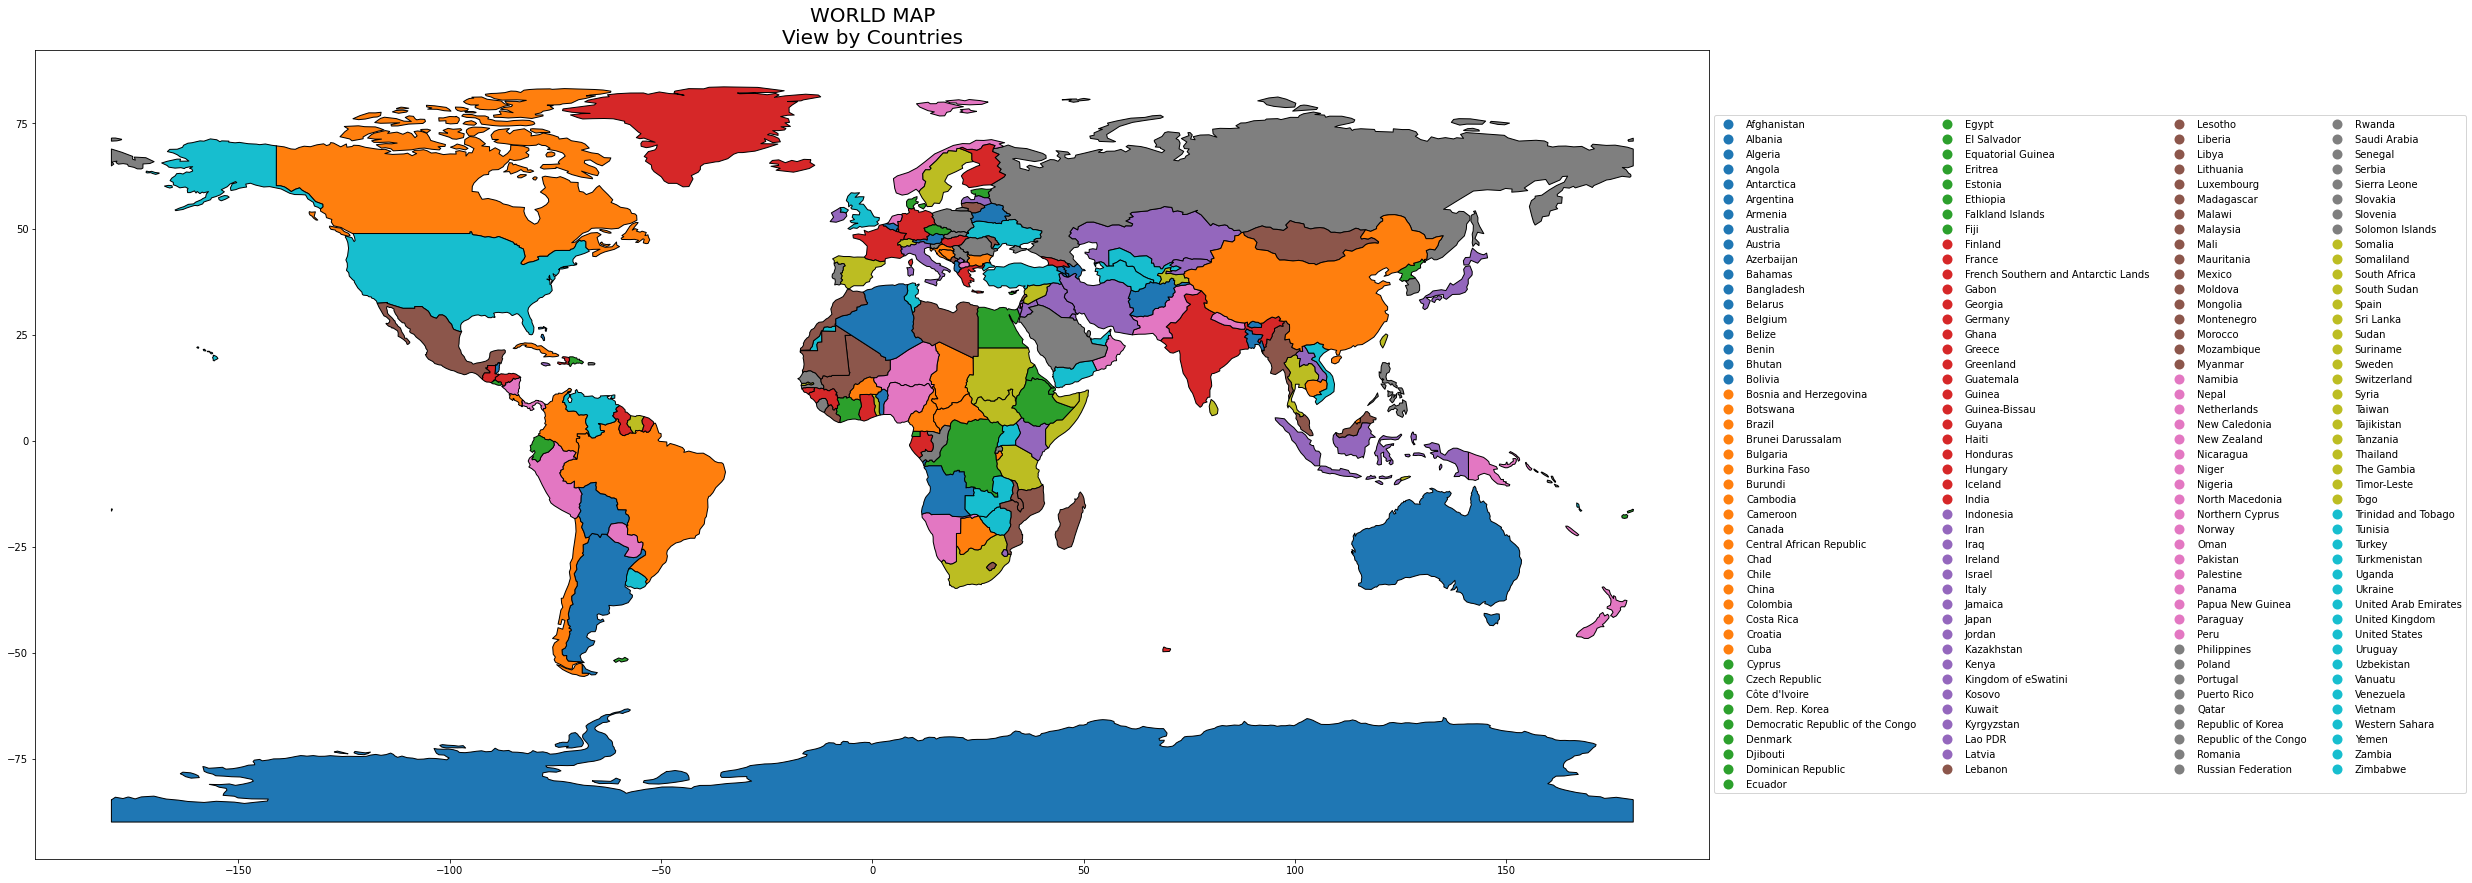

In [18]:
# Plotting the map
ax = world_df.plot(figsize=(30,15), column= 'name_long', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 4, 'bbox_to_anchor':(1,0.5)})
ax.set_title('WORLD MAP\nView by Countries', fontsize=20)
plt.show()

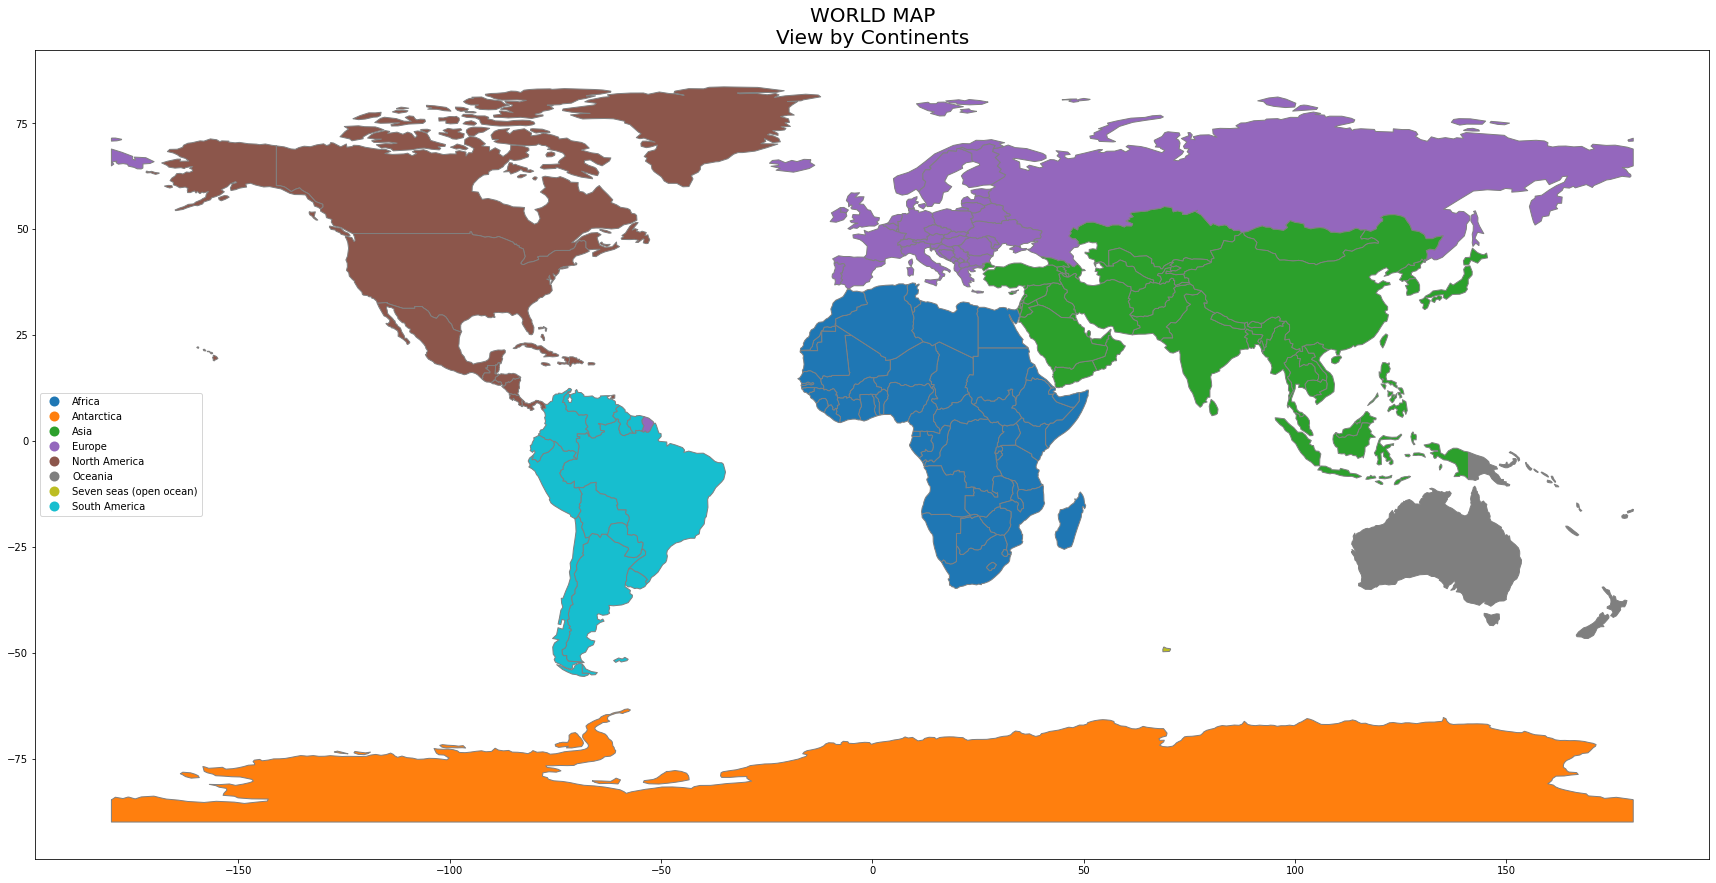

In [19]:
# Plotting the map
ax = world_df.plot(figsize=(30,15), column= 'continent', cmap= 'tab10', 
                   edgecolor= 'grey', legend= True, 
                   legend_kwds={'loc': 'center left'})#, 'ncol': 3, 'bbox_to_anchor':(1,0.5)})
ax.set_title('WORLD MAP\nView by Continents', fontsize=20)


plt.show()

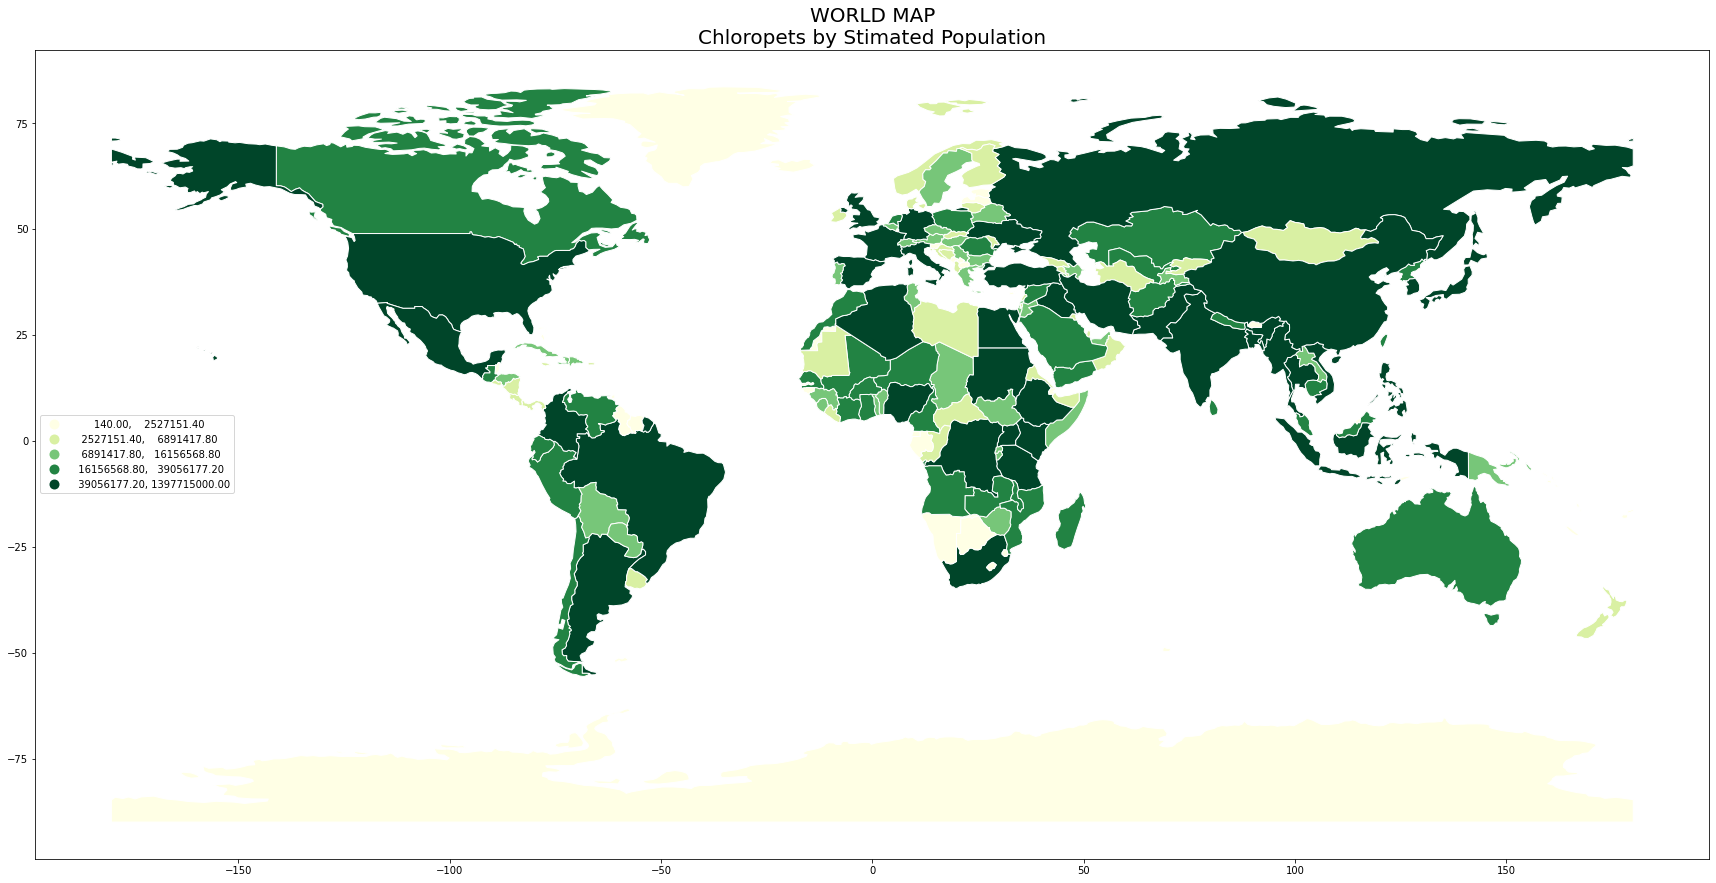

In [20]:
# Plotting the map
ax = world_df.plot(figsize=(30,20), column= 'pop_est', cmap= 'YlGn', scheme='quantiles',
                   edgecolor= 'white', legend= True, 
                   legend_kwds={'loc': 'center left'})
ax.set_title('WORLD MAP\nChloropets by Stimated Population', fontsize=20)
plt.show()

In [21]:
# for the purpose of use this boundaries as a clipper, the South America countries 
# (filtered on the CONTINENT feature) using pandas like dataframe management
south_america_df = world_df.loc[world_df.continent == 'South America',]

# fixing data
south_america_df = south_america_df.reset_index(drop=True)
#south_america_df.lastcensus = south_america_df.lastcensus.astype(str).replace({'-99':'1999'}).astype(int)

# features for plot
south_america_df['popu'] = south_america_df['pop_est'] / 1e6 # get the population in millions

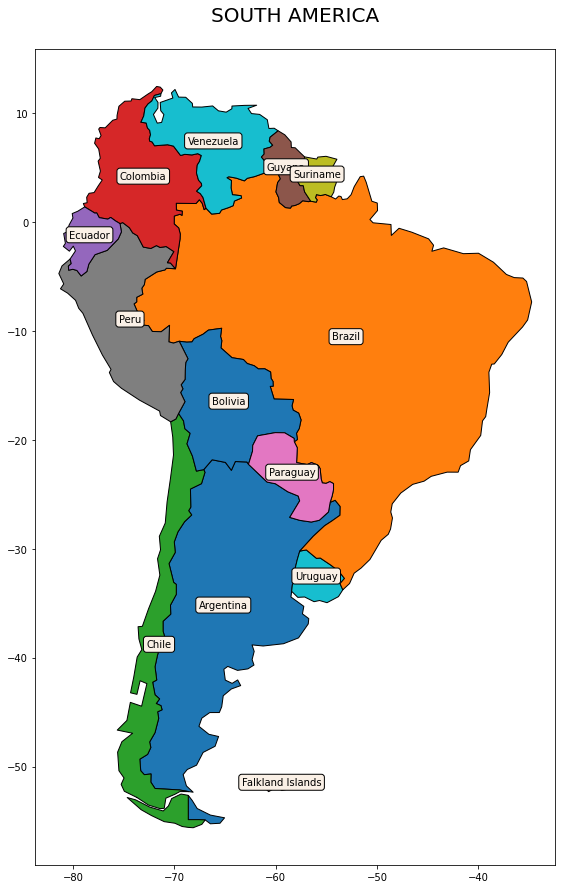

In [22]:
# Plotting the map
ax = south_america_df.plot(figsize=(10,15), column= 'name_long', cmap= 'tab10', 
                           edgecolor= 'black')
ax.set_title('SOUTH AMERICA\n', fontsize=20)

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in south_america_df.iterrows():
  ax.text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name_long'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)
# ax.axis('off') # for removing the grid
plt.show()

In [23]:
# for the purpose of use this boundaries as a clipper, the South America countries 
# (filtered on the CONTINENT feature) using pandas like dataframe management
asia_df = world_df.loc[world_df.continent == 'Asia',]

# fixing data
asia_df = asia_df.reset_index(drop=True)
#south_america_df.lastcensus = south_america_df.lastcensus.astype(str).replace({'-99':'1999'}).astype(int)

# features for plot
asia_df['popu'] = asia_df['pop_est'] /1e6  # get the population in millions

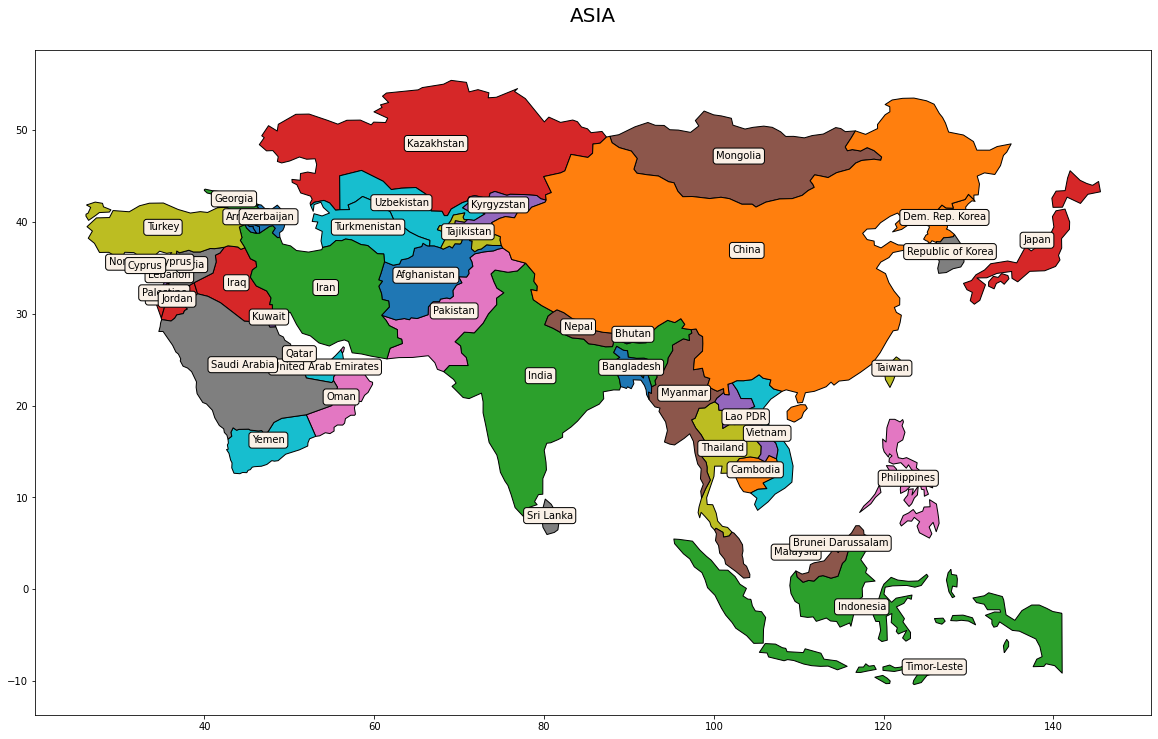

In [24]:
# Plotting the map
ax = asia_df.plot(figsize=(20,15), column= 'name_long', cmap= 'tab10', 
                           edgecolor= 'black')
ax.set_title('ASIA\n', fontsize=20)

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in asia_df.iterrows():
  ax.text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name_long'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)
# ax.axis('off') # for removing the grid
plt.show()

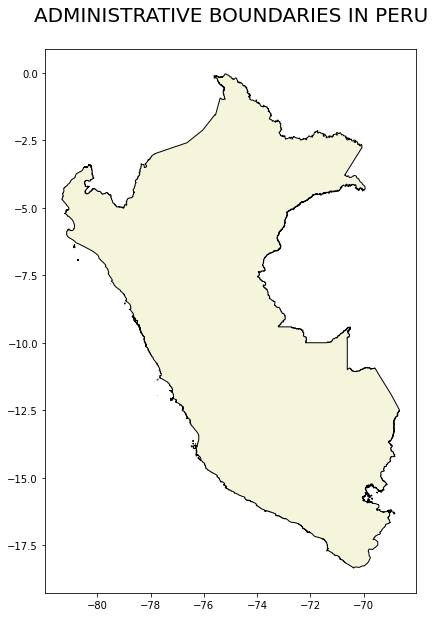

In [25]:
# Peru boundary dataset
boundary1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/PER/PER_AL2_Peru.json'

# download the data with request
boundary1_req = requests.get(boundary1).content

# load the json with geopandas and set crs
boundary_df = gpd.read_file(io.StringIO(boundary1_req.decode('utf-8')))
boundary_df = boundary_df[['name', 'geometry']]

# fix the georeference! the map seems to be cliped from a bad reference
boundary_df.to_crs(5389, inplace=True)
boundary_df.to_crs(4326, inplace=True) # now is WGS84 again!

# Plotting the map
ax = boundary_df.plot(figsize=(15,10), color= 'beige', edgecolor= 'black')
ax.set_title('ADMINISTRATIVE BOUNDARIES IN PERU\n', fontsize=20)
plt.show()

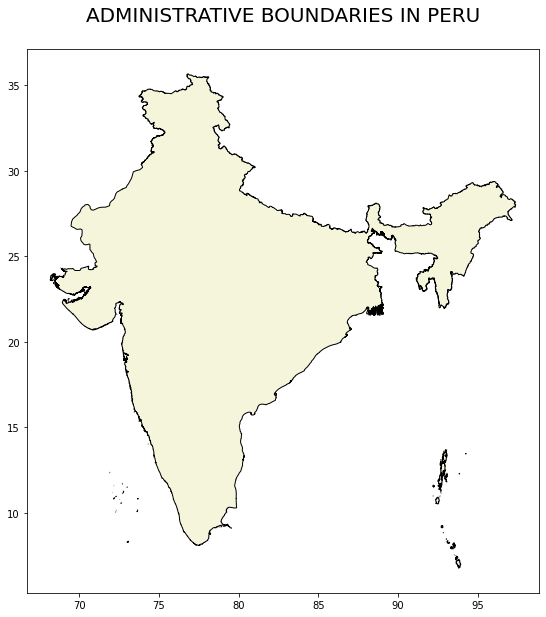

In [26]:
# Peru boundary dataset
boundary1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India.json'

# download the data with request
boundary1_req = requests.get(boundary1).content

# load the json with geopandas and set crs
boundary_df = gpd.read_file(io.StringIO(boundary1_req.decode('utf-8')))
boundary_df = boundary_df[['name', 'geometry']]

# fix the georeference! the map seems to be cliped from a bad reference
boundary_df.to_crs(5389, inplace=True)
boundary_df.to_crs(4326, inplace=True) # now is WGS84 again!

# Plotting the map
ax = boundary_df.plot(figsize=(15,10), color= 'beige', edgecolor= 'black')
ax.set_title('ADMINISTRATIVE BOUNDARIES IN PERU\n', fontsize=20)
plt.show()

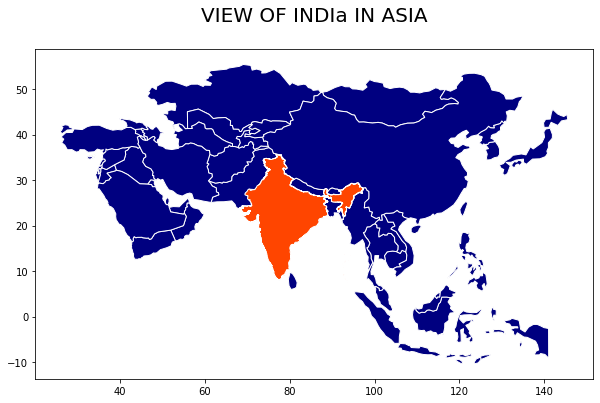

In [27]:
# Plotting India in Asia
ax = asia_df.plot(figsize=(10,15), color= 'navy', edgecolor= 'white')
boundary_df.plot(ax=ax, color='orangered', edgecolor='white')
ax.set_title('VIEW OF INDIa IN ASIA\n', fontsize=20)

plt.show()

In [28]:
# Indian States for review : Maharashtra and Karnataka

# state (Departamento) dataset
mh1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Maharashtra_WSR.json'
kn1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Karnataka_GEZ.json'

# download the data with request
mh1_req = requests.get(mh1).content
kn1_req = requests.get(kn1).content

# load the json with geopandas and set crs
mhBoundary_df = gpd.read_file(io.StringIO(mh1_req.decode('utf-8')))
mhBoundary_df = mhBoundary_df[['name', 'geometry']]
mhBoundary_df.set_crs(epsg=4326, inplace=True)
knBoundary_df = gpd.read_file(io.StringIO(kn1_req.decode('utf-8')))
knBoundary_df = knBoundary_df[['name', 'geometry']]
knBoundary_df.set_crs(epsg=4326, inplace=True)

# fix the georeference! the map seems to be cliped from a bad reference
mhBoundary_df.to_crs(5389, inplace=True)
mhBoundary_df.to_crs(4326, inplace=True) 
knBoundary_df.to_crs(5389, inplace=True)
knBoundary_df.to_crs(4326, inplace=True)


print('Maharashtra dataset has %2d rows and %2d columns' %(mhBoundary_df.shape[0], mhBoundary_df.shape[1]))
print('Karnataka dataset has %2d rows and %2d columns' %(knBoundary_df.shape[0], knBoundary_df.shape[1]))

Maharashtra dataset has  3 rows and  2 columns
Karnataka dataset has  4 rows and  2 columns


In [29]:
# Using pandas to concatenate the dataframes. This is so cool!
regionsBoundary_df = pd.concat([mhBoundary_df, knBoundary_df], ignore_index=True)

# features for plot
regionsBoundary_df['centroid'] = regionsBoundary_df.geometry.centroid # adding centroid for plotting names in the map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


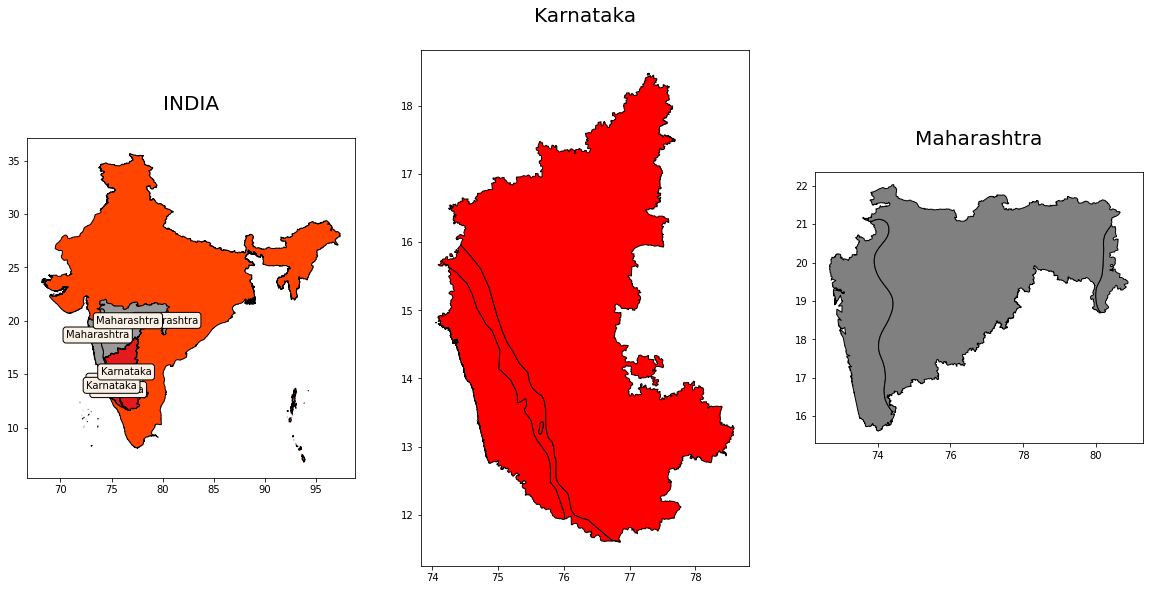

In [30]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('INDIA\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='orangered', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], column='name', cmap='Set1', edgecolor='black')
# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in regionsBoundary_df.iterrows():
  axes[0].text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)

# second map axes[1]
axes[1].set_title('Karnataka\n', fontsize=20)
knBoundary_df.plot(ax=axes[1], color='red', edgecolor='black')

# third map axes[2]
axes[2].set_title('Maharashtra\n', fontsize=20)
mhBoundary_df.plot(ax=axes[2], color='grey', edgecolor='black')

plt.show()

In [31]:
# World Soil resources
soil1 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson'

# download the data with request
soil1_req = requests.get(soil1).content

# load the json with geopandas
soil_df = gpd.read_file(io.StringIO(soil1_req.decode('utf-8')))
soil_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
soil_df.columns = soil_df.columns.str.lower()

print('World Soil resources dataset has %2d rows and %2d columns' %(soil_df.shape[0], soil_df.shape[1]))

World Soil resources dataset has 33 rows and  3 columns


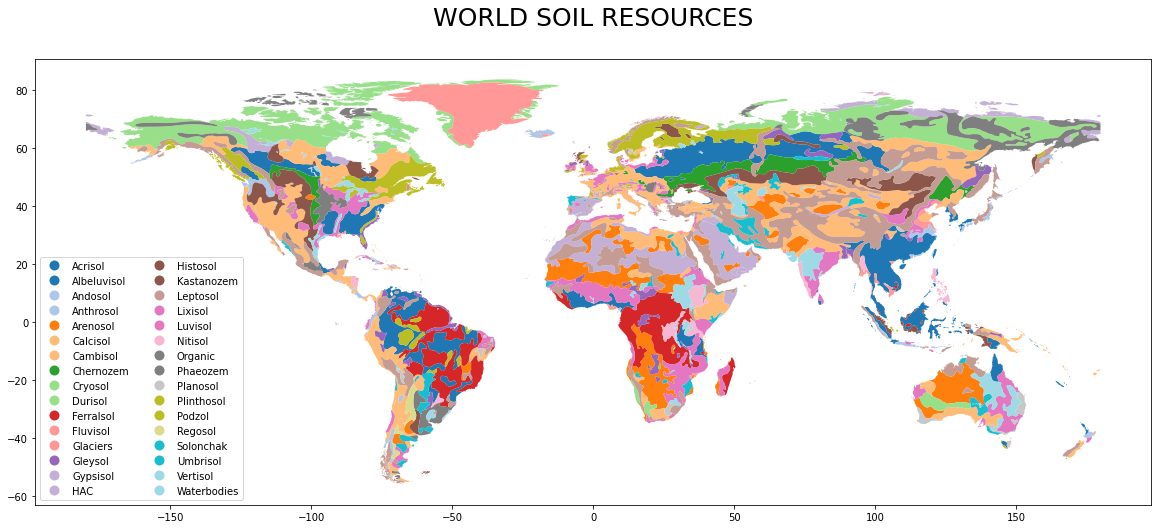

In [32]:
# plotting the map
ax = soil_df.plot(figsize = (20,10), column = 'ipcc', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower left', 'ncol': 2})
ax.set_title('WORLD SOIL RESOURCES\n', fontsize=25)
plt.show()

In [33]:
# Using geopandas to clip soil_df in the shape of asia_df
asiaSoil_df = soil_df.clip(asia_df)
aisaSoil_df= asiaSoil_df.reset_index(drop=True) # removing index

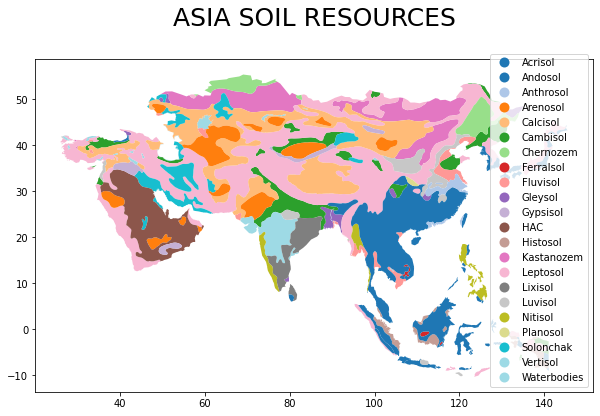

In [34]:
# plotting the map
ax = asiaSoil_df.plot(figsize = (10,15), column = 'ipcc', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower right'})
ax.set_title('ASIA SOIL RESOURCES\n', fontsize=25)
plt.show()

In [35]:
# India Soil resources
indiaSoil1 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byCountry/IND_AL2_India_WSR.json'

# download the data with request
indiaSoil1_req = requests.get(indiaSoil1).content

# load the json with geopandas
indiaSoil_df = gpd.read_file(io.StringIO(indiaSoil1_req.decode('utf-8')))

# fix the georeference the map seems to be cliped from a bad reference
indiaSoil_df.to_crs(5389, inplace=True)
indiaSoil_df.to_crs(4326, inplace=True) # now is WGS84

# fixing the data
# standardizing column names
indiaSoil_df.columns = indiaSoil_df.columns.str.lower()

# drop useless columns
indiaSoil_df = indiaSoil_df[['sname', 'ipcc', 'geometry']]

print('Indian Soil resources dataset has %2d rows and %2d columns' %(indiaSoil_df.shape[0], indiaSoil_df.shape[1]))

Indian Soil resources dataset has 12 rows and  3 columns


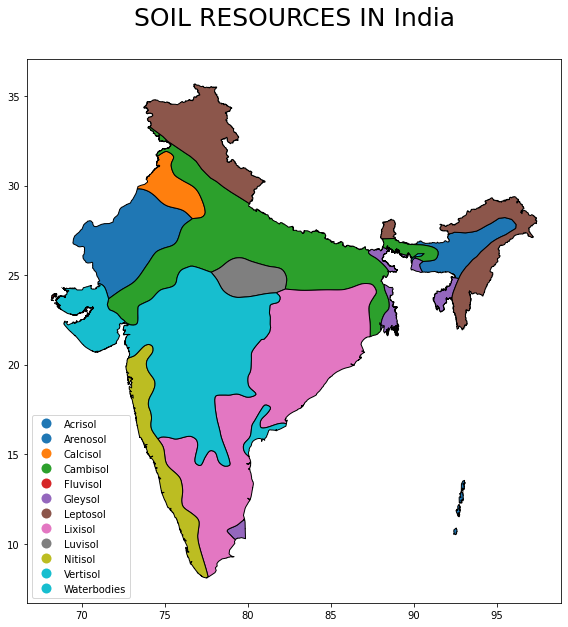

In [36]:
# plotting the map
ax = indiaSoil_df.plot(figsize = (20,10), column = 'ipcc',
                  edgecolor='black', cmap='tab10', legend= True, 
                  legend_kwds= {'loc': 'lower left'})
ax.set_title('SOIL RESOURCES IN India\n', fontsize=25)
plt.show()

In [37]:
# state dataset
mh2 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/IND/IND_AL4_Maharashtra_WSR.json'
kn2 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/IND/IND_AL4_Karnataka_WSR.json'

# download the data with request
mh2_req = requests.get(mh2).content
kn2_req = requests.get(kn2).content

# load the json with geopandas and set_crs
mhSoil_df = gpd.read_file(io.StringIO(mh2_req.decode('utf-8')))
knSoil_df = gpd.read_file(io.StringIO(kn2_req.decode('utf-8')))

# fix the georeference! the map seems to be cliped from a bad reference
mhSoil_df.to_crs(5389, inplace=True)
mhSoil_df.to_crs(4326, inplace=True) 
knSoil_df.to_crs(5389, inplace=True)
knSoil_df.to_crs(4326, inplace=True)

# fixing the data
# standardizing column names
knSoil_df.columns = knSoil_df.columns.str.lower()
mhSoil_df.columns = mhSoil_df.columns.str.lower()

# drop useless columns
mhSoil_df = mhSoil_df[['sname', 'ipcc', 'geometry']]
knSoil_df = knSoil_df[['sname', 'ipcc', 'geometry']]

print('Maharashtra\'s Soil dataset has %2d rows and %2d columns' %(mhSoil_df.shape[0], mhSoil_df.shape[1]))
print('Karnataka Soil\'s dataset has %2d rows and %2d columns' %(knSoil_df.shape[0], knSoil_df.shape[1]))

Maharashtra's Soil dataset has  3 rows and  3 columns
Karnataka Soil's dataset has  3 rows and  3 columns


In [38]:
# Using pandas to concatenate the dataframes.
regionsSoil_df = pd.concat([mhSoil_df, knSoil_df], ignore_index=True)

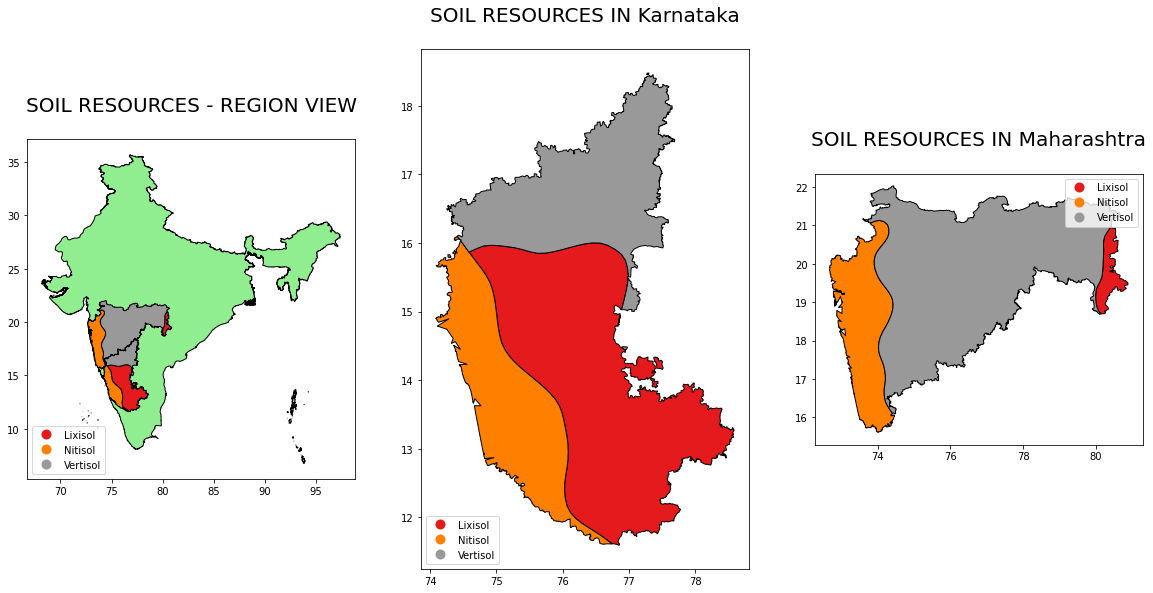

In [39]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('SOIL RESOURCES - REGION VIEW\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='lightgreen', edgecolor='black')
regionsSoil_df.plot(ax=axes[0], column='ipcc', cmap='Set1', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('SOIL RESOURCES IN Karnataka\n', fontsize=20)
knSoil_df.plot(ax=axes[1], column='ipcc', cmap='Set1', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('SOIL RESOURCES IN Maharashtra\n', fontsize=20)
mhSoil_df.plot(ax=axes[2], column='ipcc', cmap='Set1', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.show()

In [40]:
# Biodiversity Hotspots dataset
bioHot = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'

# download the data with request
bioHot_req = requests.get(bioHot).content

# load the json with geopandas
bioHot_df = gpd.read_file(io.StringIO(bioHot_req.decode('utf-8')))
bioHot_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
bioHot_df.columns = bioHot_df.columns.str.lower()

print('The Biodiversity Hotspots dataset has %2d rows and %2d columns' %(bioHot_df.shape[0], bioHot_df.shape[1]))

The Biodiversity Hotspots dataset has 53 rows and  6 columns


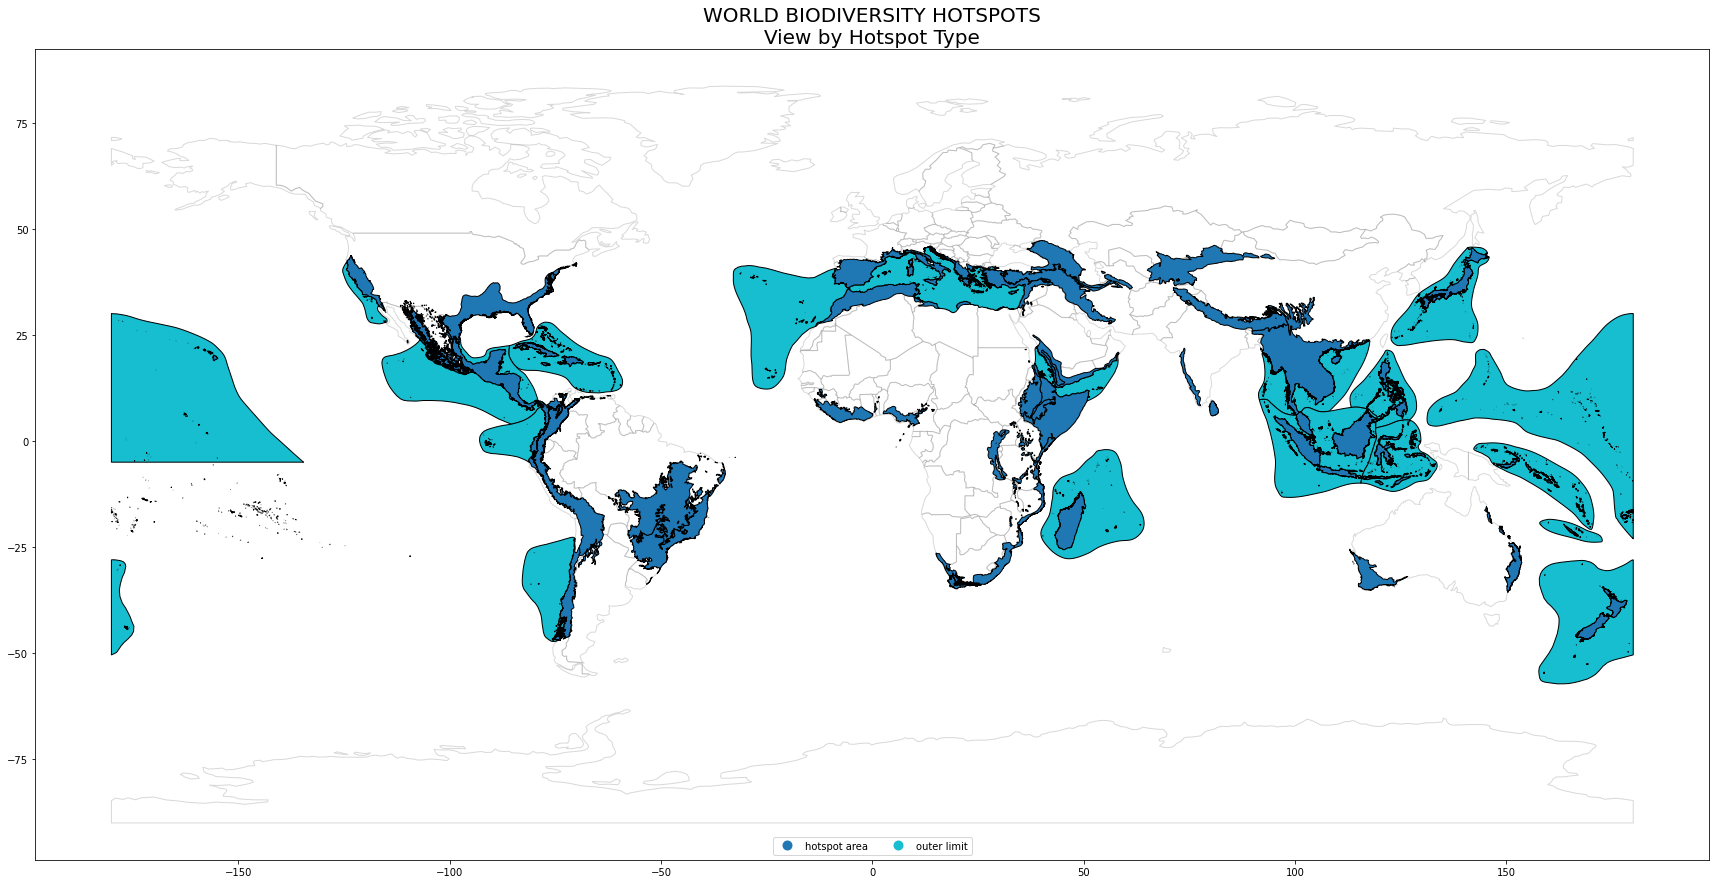

In [41]:
# Plotting the map
ax = world_df.plot(figsize=(30,15), color='none', edgecolor='grey', alpha=0.3)
bioHot_df.plot(ax = ax, column= 'type', cmap= 'tab10', edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'lower center', 'ncol': 2})
ax.set_title('WORLD BIODIVERSITY HOTSPOTS\nView by Hotspot Type', fontsize=20)
plt.show()

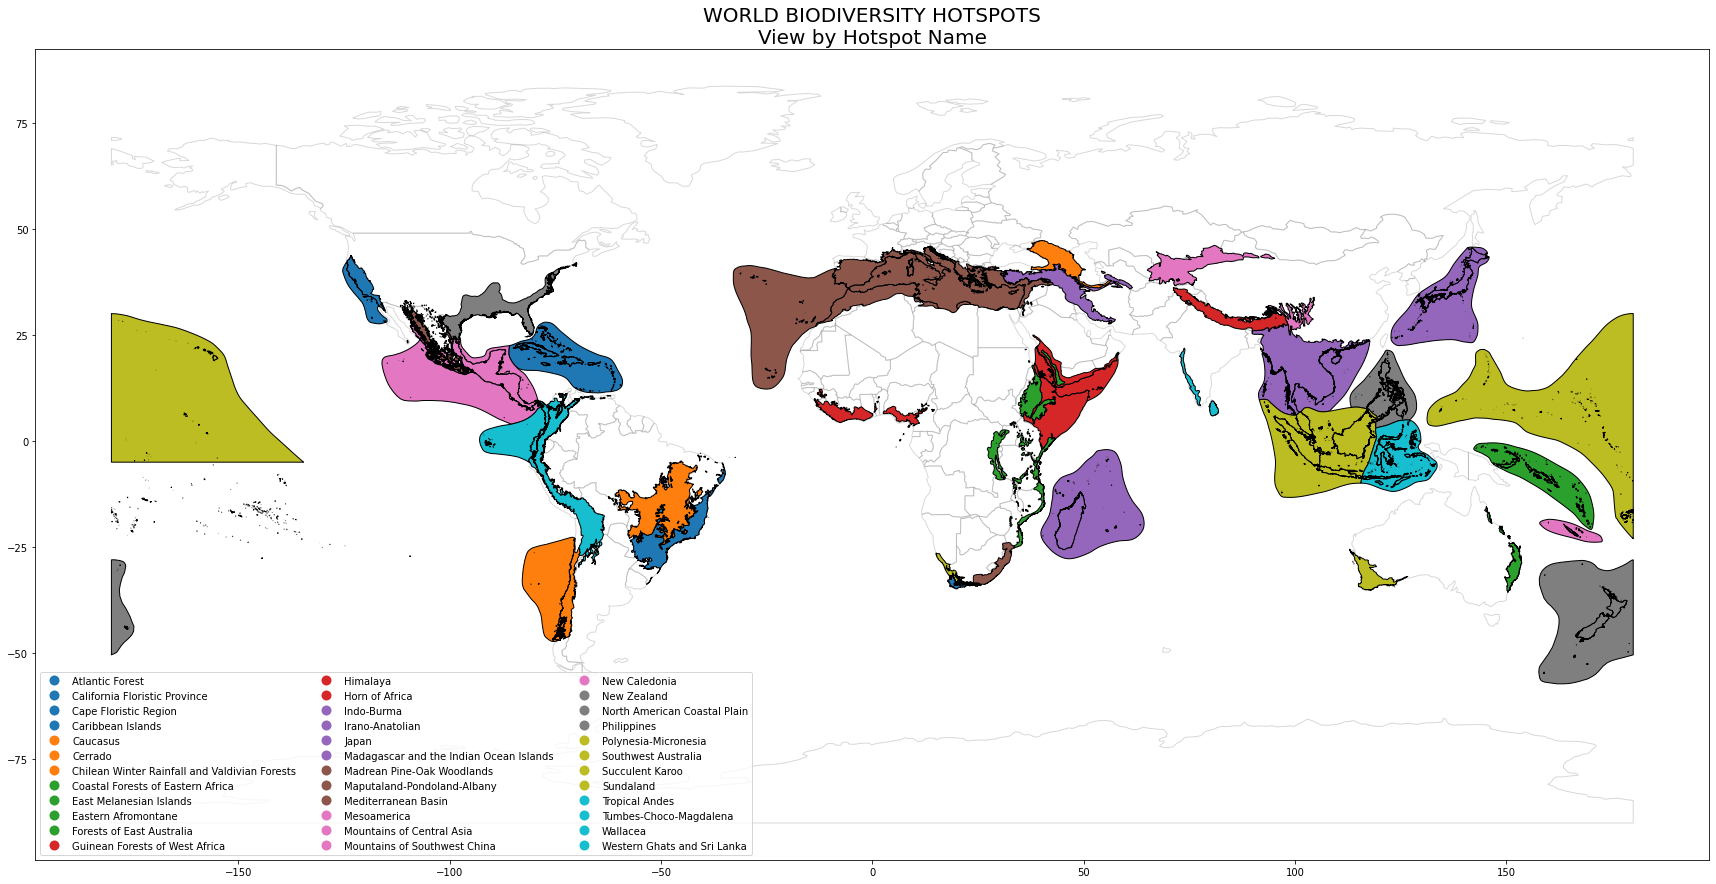

In [42]:
# Plotting the map
ax = world_df.plot(figsize=(30,15), color='none', edgecolor='grey', alpha=0.3)
bioHot_df.plot(ax = ax, column= 'name', cmap= 'tab10', edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'lower left', 'ncol': 3})
ax.set_title('WORLD BIODIVERSITY HOTSPOTS\nView by Hotspot Name', fontsize=20)
plt.show()

In [43]:
# creating dataframe
asiaBioHot_df = bioHot_df.clip(asia_df)
asiaBioHot_df = asiaBioHot_df.reset_index(drop=True)

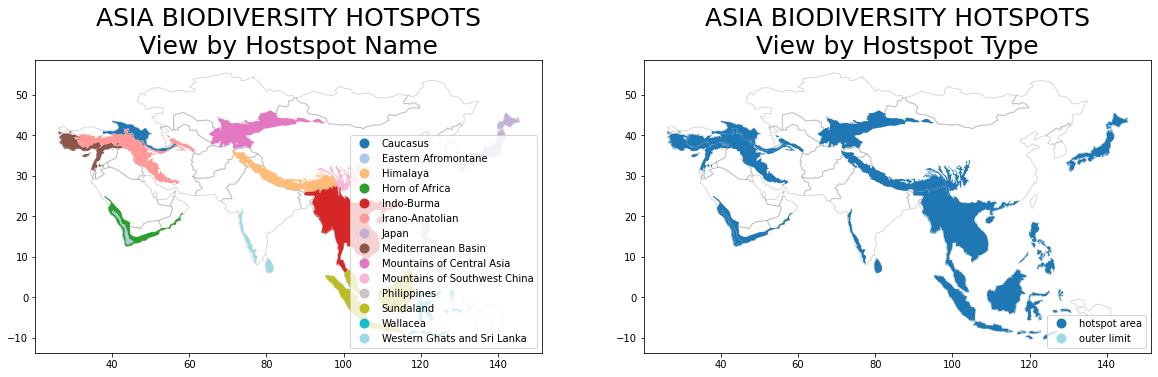

In [44]:
# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(20,50))

# first map axes[0]
axes[0].set_title('ASIA BIODIVERSITY HOTSPOTS\nView by Hostspot Name', fontsize=25)
asia_df.plot(ax=axes[0], color='none', edgecolor='grey', alpha=0.3)
asiaBioHot_df.plot(ax=axes[0], column = 'name', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower right'})

# second map axes[1]
axes[1].set_title('ASIA BIODIVERSITY HOTSPOTS\nView by Hostspot Type', fontsize=25)
asia_df.plot(ax=axes[1], color='none', edgecolor='grey', alpha=0.3)
asiaBioHot_df.plot(ax=axes[1], column = 'type', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower right'})

plt.show()

In [45]:
# creating dataframe
indiaBioHot_df= bioHot_df.clip(boundary_df)
indiaBioHot_df = indiaBioHot_df.reset_index(drop=True)

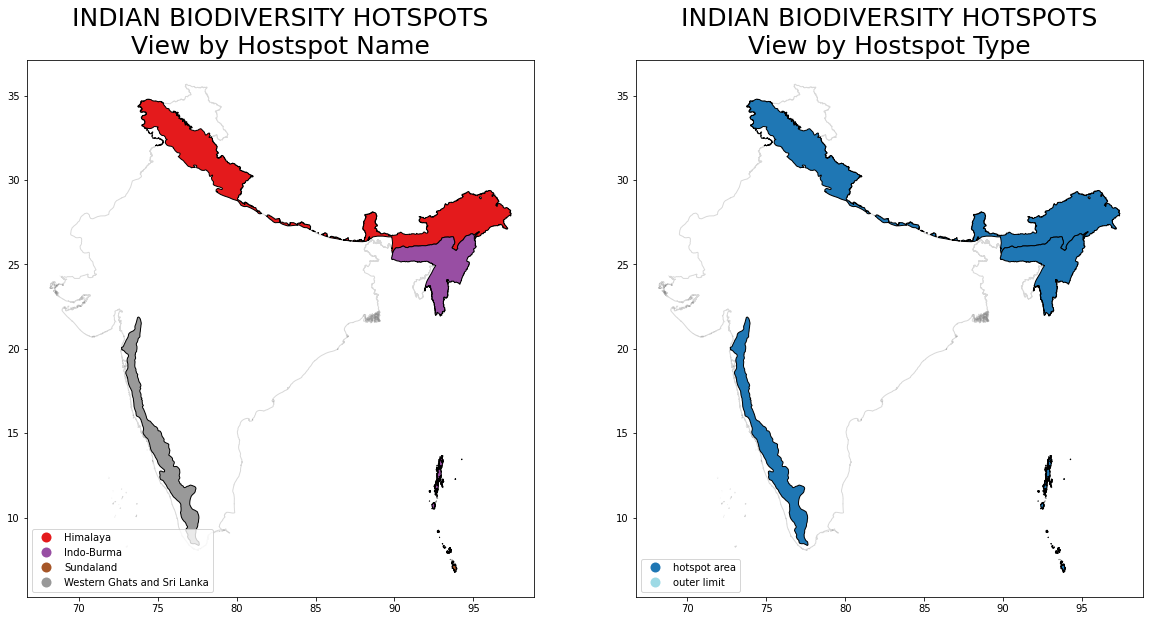

In [46]:
# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(20,50))

# first map axes[0]
axes[0].set_title('INDIAN BIODIVERSITY HOTSPOTS\nView by Hostspot Name', fontsize=25)
boundary_df.plot(ax=axes[0], color='none', edgecolor='grey', alpha=0.3)
indiaBioHot_df.plot(ax=axes[0], column = 'name', cmap='Set1', edgecolor='black', legend= True, 
                  legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('INDIAN BIODIVERSITY HOTSPOTS\nView by Hostspot Type', fontsize=25)
boundary_df.plot(ax=axes[1], color='none', edgecolor='grey', alpha=0.3)
indiaBioHot_df.plot(ax=axes[1], column = 'type', cmap='tab20', edgecolor='black', legend= True, 
                  legend_kwds={'loc': 'lower left'})

plt.show()

In [47]:
knBioHot_df = bioHot_df.clip(knBoundary_df)
knBioHot_df = knBioHot_df.reset_index(drop=True)
mhBioHot_df = bioHot_df.clip(mhBoundary_df)
mhBioHot_df = mhBioHot_df.reset_index(drop=True)

In [48]:
# Using pandas to concatenate the dataframes.
regionsBioHot_df = pd.concat([mhBioHot_df, knBioHot_df], ignore_index=True)

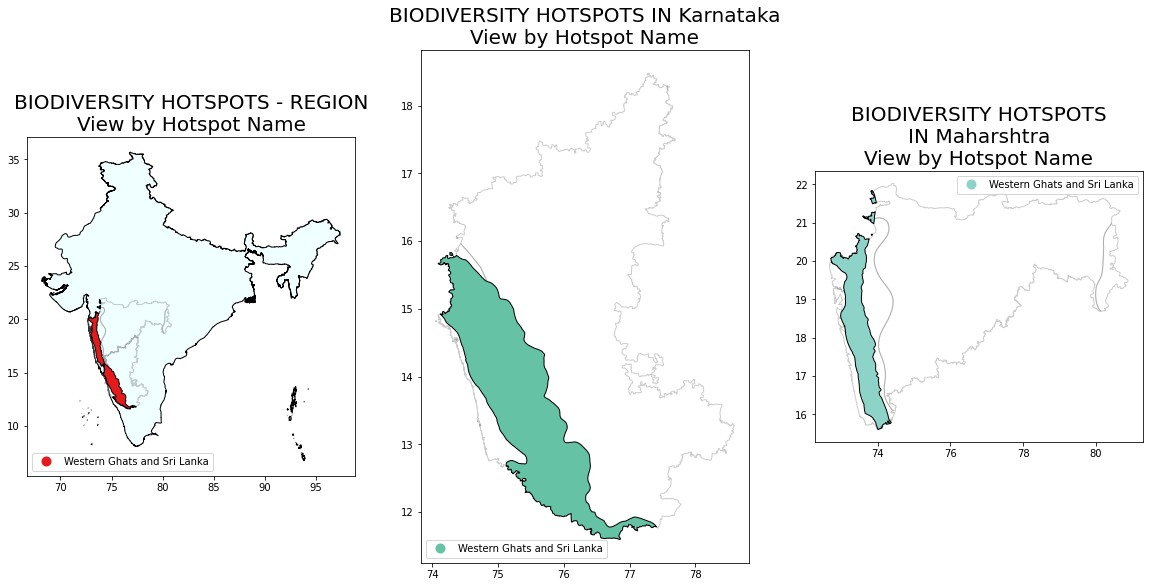

In [49]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('BIODIVERSITY HOTSPOTS - REGION\nView by Hotspot Name', fontsize=20)
boundary_df.plot(ax=axes[0], color='azure', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], color='none', edgecolor='grey',  alpha=0.4)
regionsBioHot_df.plot(ax=axes[0], column='name', cmap='Set1', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('BIODIVERSITY HOTSPOTS IN Karnataka\nView by Hotspot Name', fontsize=20)
knBoundary_df.plot(ax=axes[1], color='none', edgecolor='grey',  alpha=0.4)
knBioHot_df.plot(ax=axes[1], column='name', cmap='Set2', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('BIODIVERSITY HOTSPOTS\nIN Maharshtra\nView by Hotspot Name', fontsize=20)
mhBoundary_df.plot(ax=axes[2], color='none', edgecolor='grey',  alpha=0.4)
mhBioHot_df.plot(ax=axes[2], column='name', cmap='Set3', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.show()

In [50]:
# Bioclimatic and Ecological Zones dataset
bioEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json'

# download the data with request
bioEco_req = requests.get(bioEco).content

# load the json with geopandas
bioEco_df = gpd.read_file(io.StringIO(bioEco_req.decode('utf-8')))
bioEco_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
bioEco_df.columns = bioEco_df.columns.str.lower()

print('The Bioclimatic and Ecological Zones dataset has %2d rows and %2d columns' %(bioEco_df.shape[0], bioEco_df.shape[1]))

KeyboardInterrupt: ignored

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1444, in log
    self._log(level, msg, args, **kwargs)
  File "/usr/lib/python3.7/logging/__init__.py", line 1502, in _log
    fn, lno, func, sinfo = self.findCaller(stack_info)
  File "/usr/lib/python3.7/logging/__init__.py", line 1451, in findCaller
    f = currentframe()
  File "/usr/lib/python3.7/logging/__init__.py", line 154, in <lambda>
    currentframe = lambda: sys._getframe(3)
KeyboardInterrupt: 


The Bioclimatic and Ecological Zones dataset has 16 rows and  4 columns


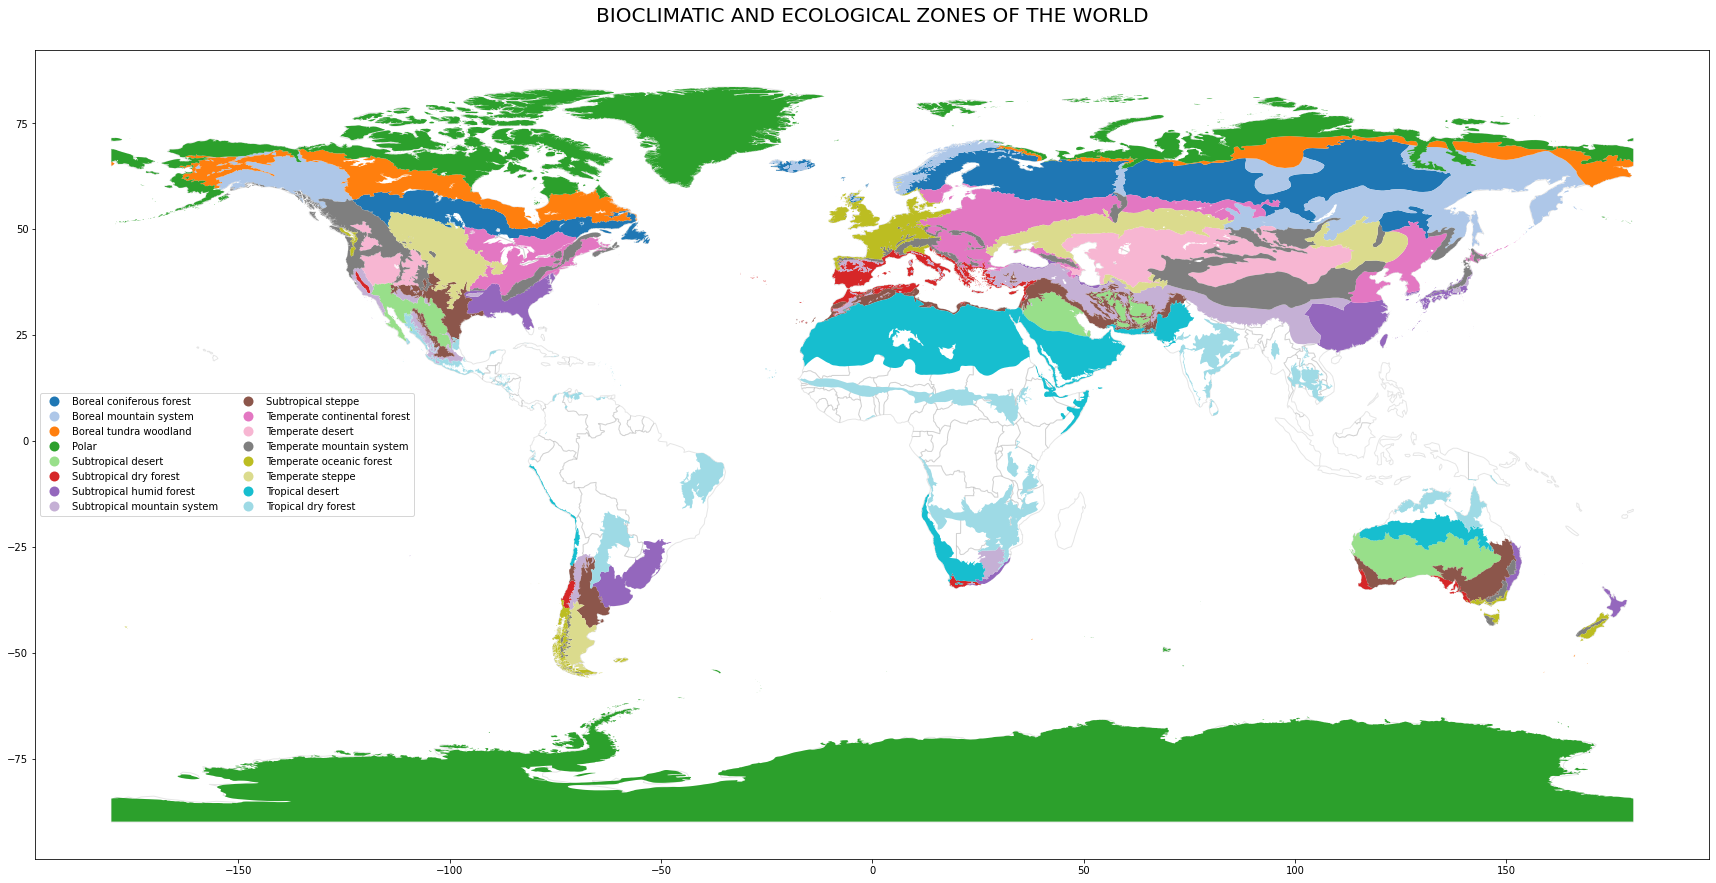

In [51]:
# Plotting the map
ax = world_df.plot(figsize=(30,15), color='none', edgecolor='grey', alpha=0.2)
bioEco_df.plot(ax =ax, column= 'gez_name', cmap= 'tab20', legend= True, 
                  legend_kwds={'loc': 'center left', 'ncol': 2})
ax.set_title('BIOCLIMATIC AND ECOLOGICAL ZONES OF THE WORLD\n', fontsize=20)
plt.show()

In [52]:
# creating dataframe
asiabioEco_df = bioEco_df.clip(asia_df)
asiabioEco_df = asiabioEco_df.reset_index(drop=True)

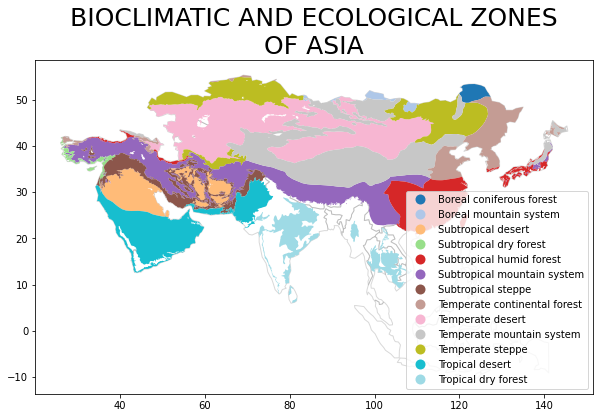

In [53]:
# Plotting in the maps
ax = asia_df.plot(figsize=(10,15), color='none', edgecolor='grey', alpha=0.3)
asiabioEco_df.plot(ax=ax, column = 'gez_name', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower right'})
ax.set_title('BIOCLIMATIC AND ECOLOGICAL ZONES\nOF ASIA', fontsize=25)

plt.show()

In [54]:
# Indian dataset
indiabioEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byCountry/IND_AL2_India_GEZ.json'

# download the data with request
indiabioEco_req = requests.get(indiabioEco).content

# load the json with geopandas
indiabioEco_df = gpd.read_file(io.StringIO(indiabioEco_req.decode('utf-8')))

# fix the georeference! the map seems to be cliped from a bad reference
indiabioEco_df.to_crs(5389, inplace=True)
indiabioEco_df.to_crs(4326, inplace=True)

# fixing the data: standardizing column names
bioEco_df.columns = bioEco_df.columns.str.lower()

print('indian Bioclimatic an Ecological Zones has %2d rows and %2d columns' %(indiabioEco_df.shape[0], indiabioEco_df.shape[1]))

indian Bioclimatic an Ecological Zones has  9 rows and  8 columns


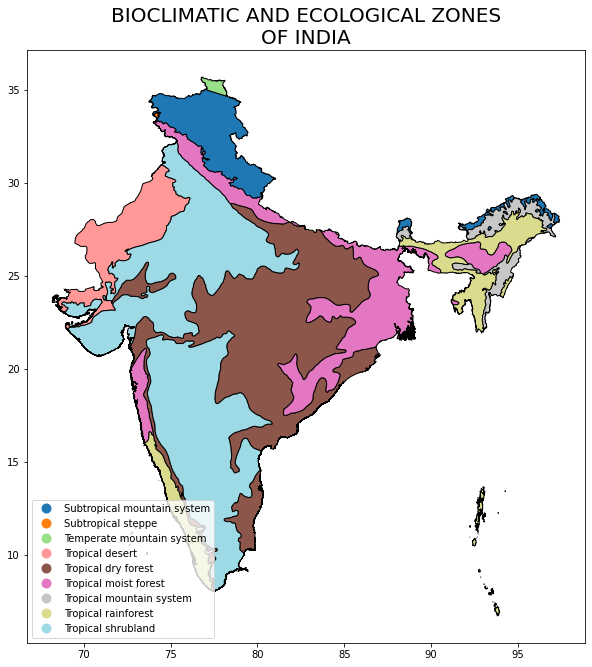

In [55]:
# plotting the map
ax = indiabioEco_df.plot(figsize = (10,15), column = 'gez_name',
                  edgecolor='black', cmap='tab20', legend= True, 
                  legend_kwds= {'loc': 'lower left'})
ax.set_title('BIOCLIMATIC AND ECOLOGICAL ZONES\nOF INDIA', fontsize=20)
plt.show()

In [56]:
# Peruvian 'Departamentos' choosed for review: kn and Madre de Dios.

# state (Departamento) dataset
mhBioEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Maharashtra_GEZ.json'
knBioEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Karnataka_GEZ.json'

# download the data with request
mhBioEco_req = requests.get(mhBioEco).content
knBioEco_req = requests.get(knBioEco).content

# load the json with geopandas and set crs
mhBioEco_df = gpd.read_file(io.StringIO(mhBioEco_req.decode('utf-8')))
knBioEco_df = gpd.read_file(io.StringIO(knBioEco_req.decode('utf-8')))

# fix the georeference! the map seems to be cliped from a bad reference
mhBioEco_df.to_crs(5389, inplace=True)
mhBioEco_df.to_crs(4326, inplace=True)
knBioEco_df.to_crs(5389, inplace=True)
knBioEco_df.to_crs(4326, inplace=True)

# fixing the data, standardizing column names
knBioEco_df.columns = knBioEco_df.columns.str.lower()
mhBioEco_df.columns = mhBioEco_df.columns.str.lower()

print('Maharashtra dataset has %2d rows and %2d columns' %(mhBioEco_df.shape[0], mhBioEco_df.shape[1]))
print('Karnataka dataset has %2d rows and %2d columns' %(knBioEco_df.shape[0], knBioEco_df.shape[1]))

Maharashtra dataset has  4 rows and  8 columns
Karnataka dataset has  4 rows and  8 columns


In [57]:
# Using pandas to concatenate the dataframes.
regionsEcoHot_df = pd.concat([mhBioEco_df, knBioEco_df], ignore_index=True)

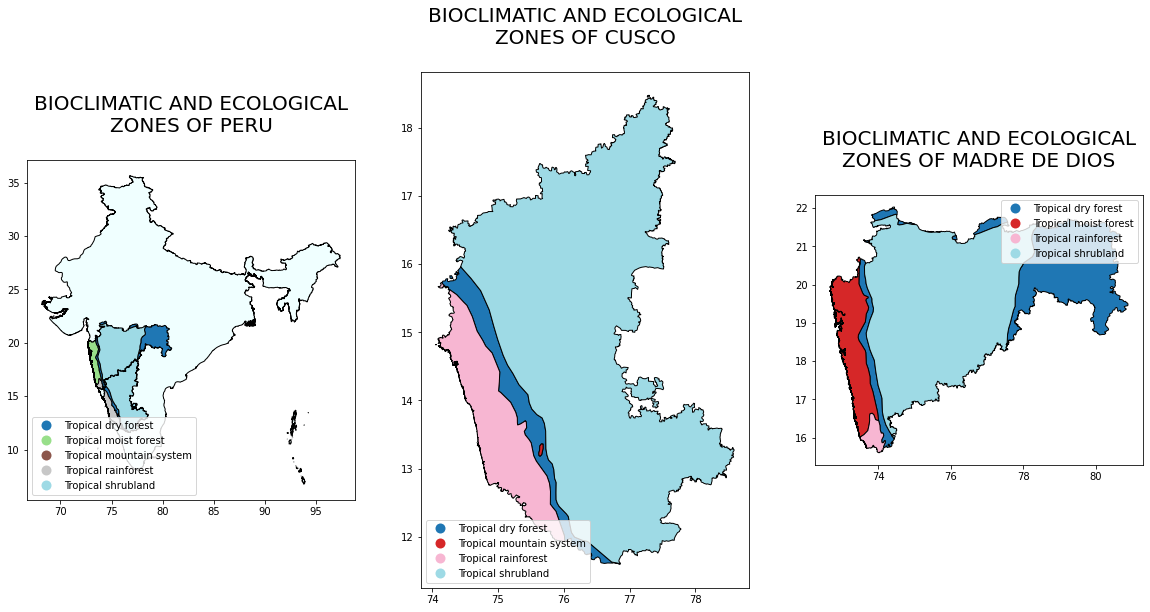

In [58]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('BIOCLIMATIC AND ECOLOGICAL\nZONES OF PERU\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='azure', edgecolor='black')
regionsEcoHot_df.plot(ax=axes[0], column='gez_name', cmap='tab20', 
                         edgecolor= 'black', legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('BIOCLIMATIC AND ECOLOGICAL\nZONES OF CUSCO\n', fontsize=20)
knBioEco_df.plot(ax=axes[1], column='gez_name', cmap='tab20', 
                         edgecolor= 'black', legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('BIOCLIMATIC AND ECOLOGICAL\nZONES OF MADRE DE DIOS\n', fontsize=20)
mhBioEco_df.plot(ax=axes[2], column='gez_name', cmap='tab20', 
                         edgecolor= 'black', legend=True, legend_kwds={'loc': 'best'})

plt.show()

In [59]:
#Global Holdridge Life Zones

In [60]:
# All Soil resources dataset
holdrigde = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'

# download the data with request
holdrigde_req = requests.get(holdrigde).content

# load the json with geopandas and set crs
holdrigde_df = gpd.read_file(io.StringIO(holdrigde_req.decode('utf-8')))
holdrigde_df.set_crs(epsg=4326, inplace=True)

# fixing the data
# standardizing column names
holdrigde_df.columns = holdrigde_df.columns.str.lower()

# removing useles columns or empty labels
holdrigde_df = holdrigde_df.loc[holdrigde_df.desc != ' '] # remove oceans
holdrigde_df = holdrigde_df[['desc', 'geometry','frequency', 'area', 'perimeter']]

print('Global Soil resources dataset has %2d rows and %2d columns.' %(holdrigde_df.shape[0], holdrigde_df.shape[1]))

Global Soil resources dataset has 4710 rows and  5 columns.


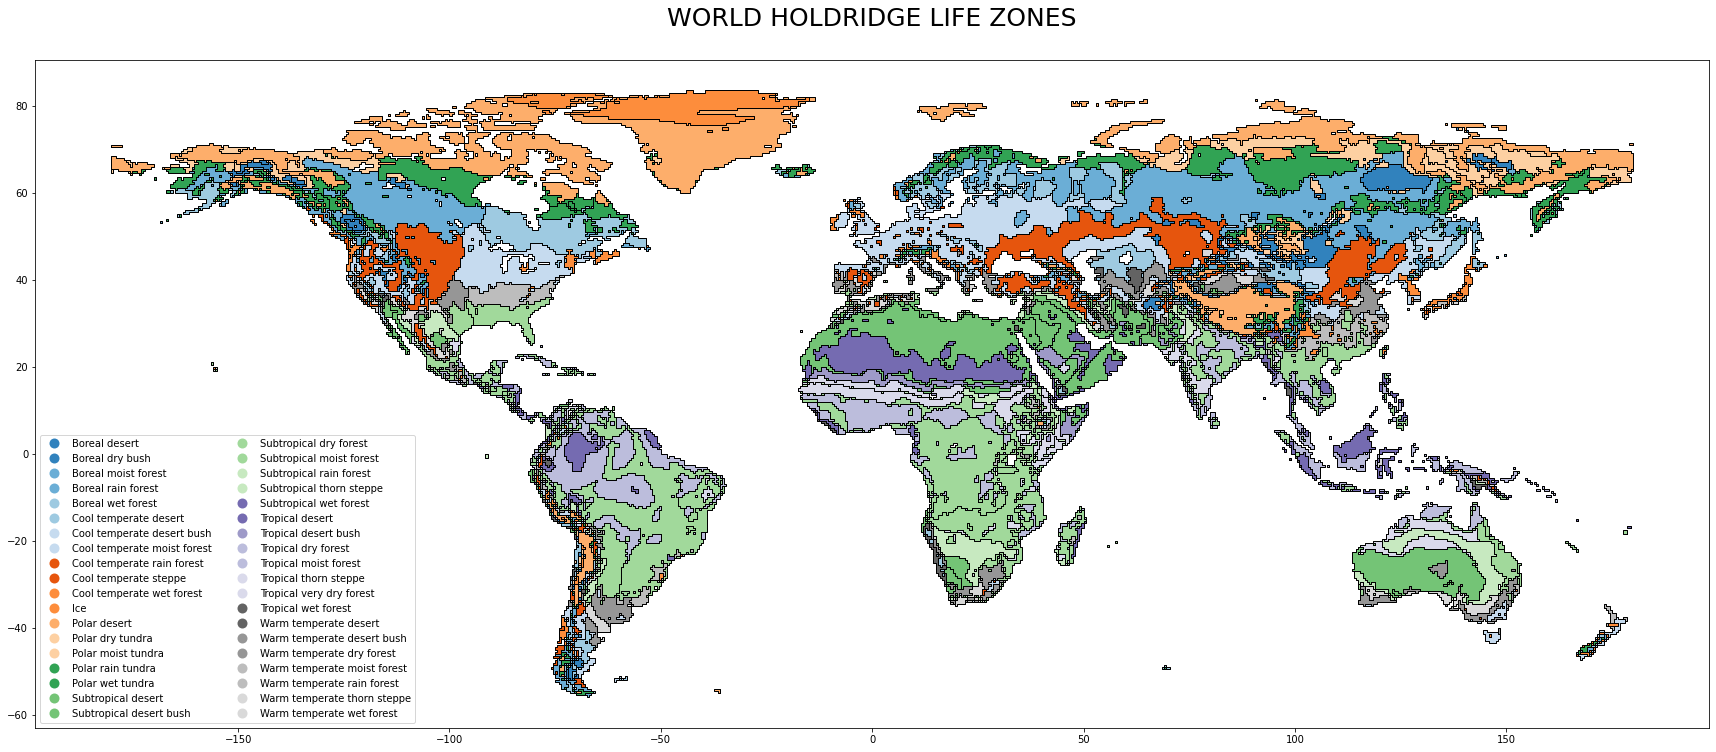

In [61]:
# Plotting in the maps
ax = holdrigde_df.plot(figsize= (30,15), column='desc', edgecolor='black', cmap='tab20c',
             legend=True, legend_kwds={'loc': 'lower left', 'ncol':2})
ax.set_title('WORLD HOLDRIDGE LIFE ZONES\n', fontsize=25)
plt.show()

In [62]:
# creating dataframe
asiaHoldridge_df = holdrigde_df.clip(asia_df)
asiaHoldridge_df = asiaHoldridge_df.reset_index(drop=True)

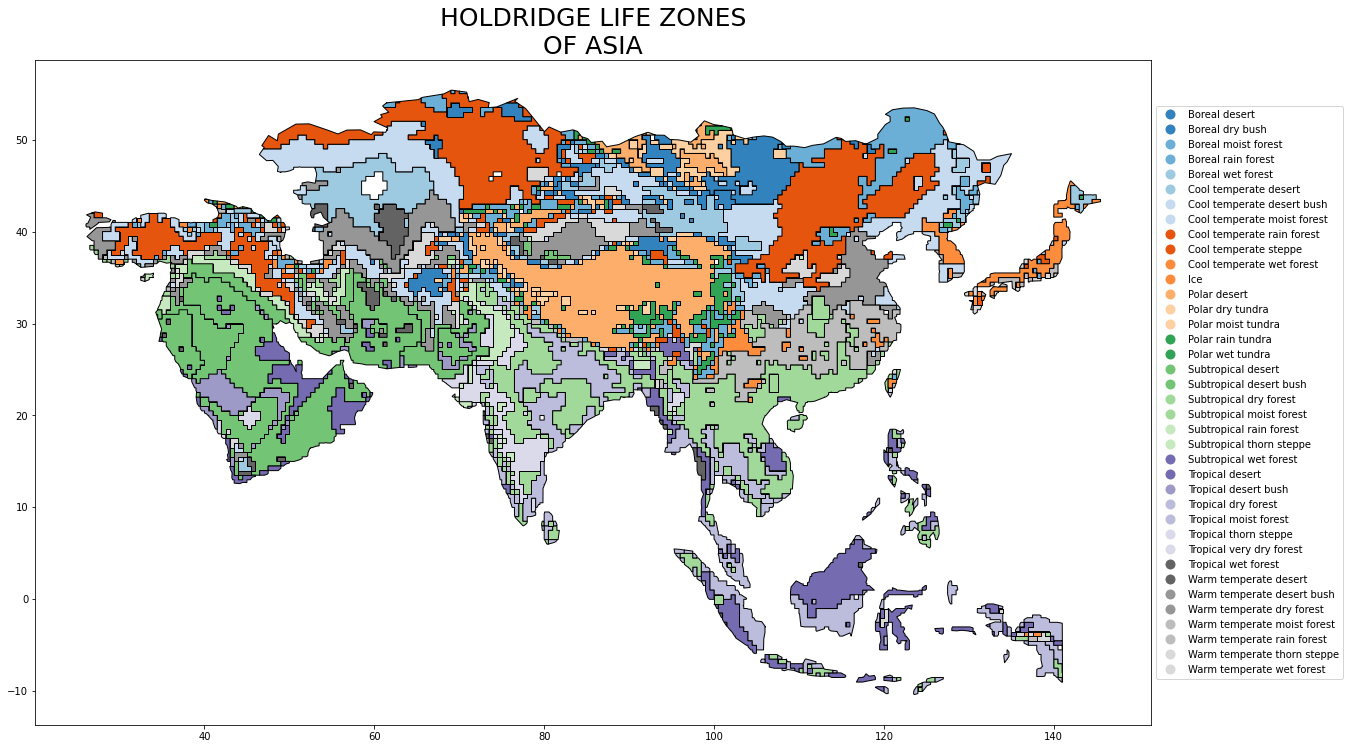

In [63]:
# Plotting in the maps
ax = asiaHoldridge_df.plot(figsize=(20,15), column = 'desc', edgecolor='black', cmap='tab20c',
                                    legend= True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('HOLDRIDGE LIFE ZONES\nOF ASIA', fontsize=25)
plt.show()

In [64]:
# creating dataframe
indiaHoldridge_df = holdrigde_df.clip(boundary_df)
indiaHoldridge_df = indiaHoldridge_df.reset_index(drop=True)

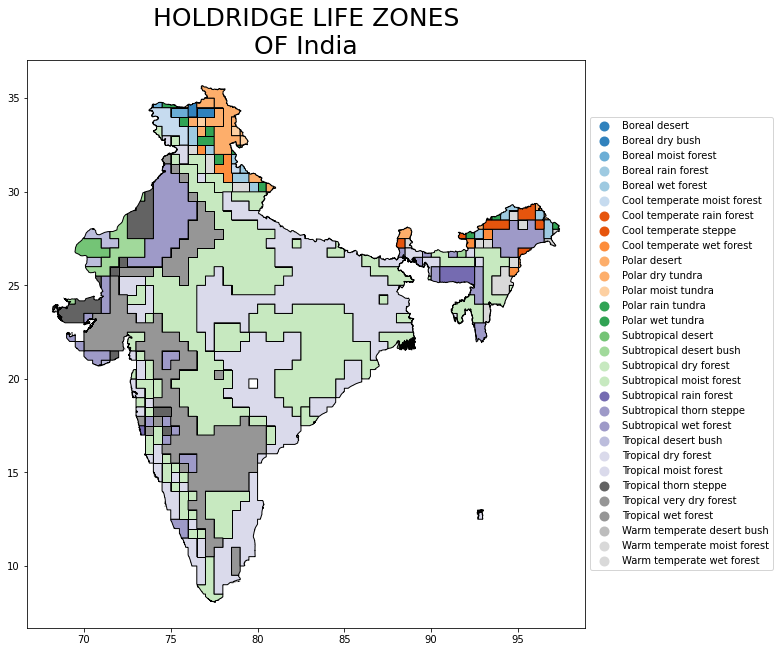

In [65]:
# Plotting in the maps
ax = indiaHoldridge_df.plot(figsize=(10,15), column = 'desc', edgecolor='black', cmap='tab20c',
                                    legend= True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('HOLDRIDGE LIFE ZONES\nOF India', fontsize=25)
plt.show()

In [66]:
# creating dataframe
mhHoldridge_df = holdrigde_df.clip(mhBoundary_df)
mhHoldridge_df = mhHoldridge_df.reset_index(drop=True)
knHoldridge_df = holdrigde_df.clip(knBoundary_df)
knHoldridge_df = knHoldridge_df.reset_index(drop=True)

In [67]:
# Using pandas to concatenate the dataframes.
regionsHoldridge_df = pd.concat([mhHoldridge_df, knHoldridge_df], ignore_index=True)

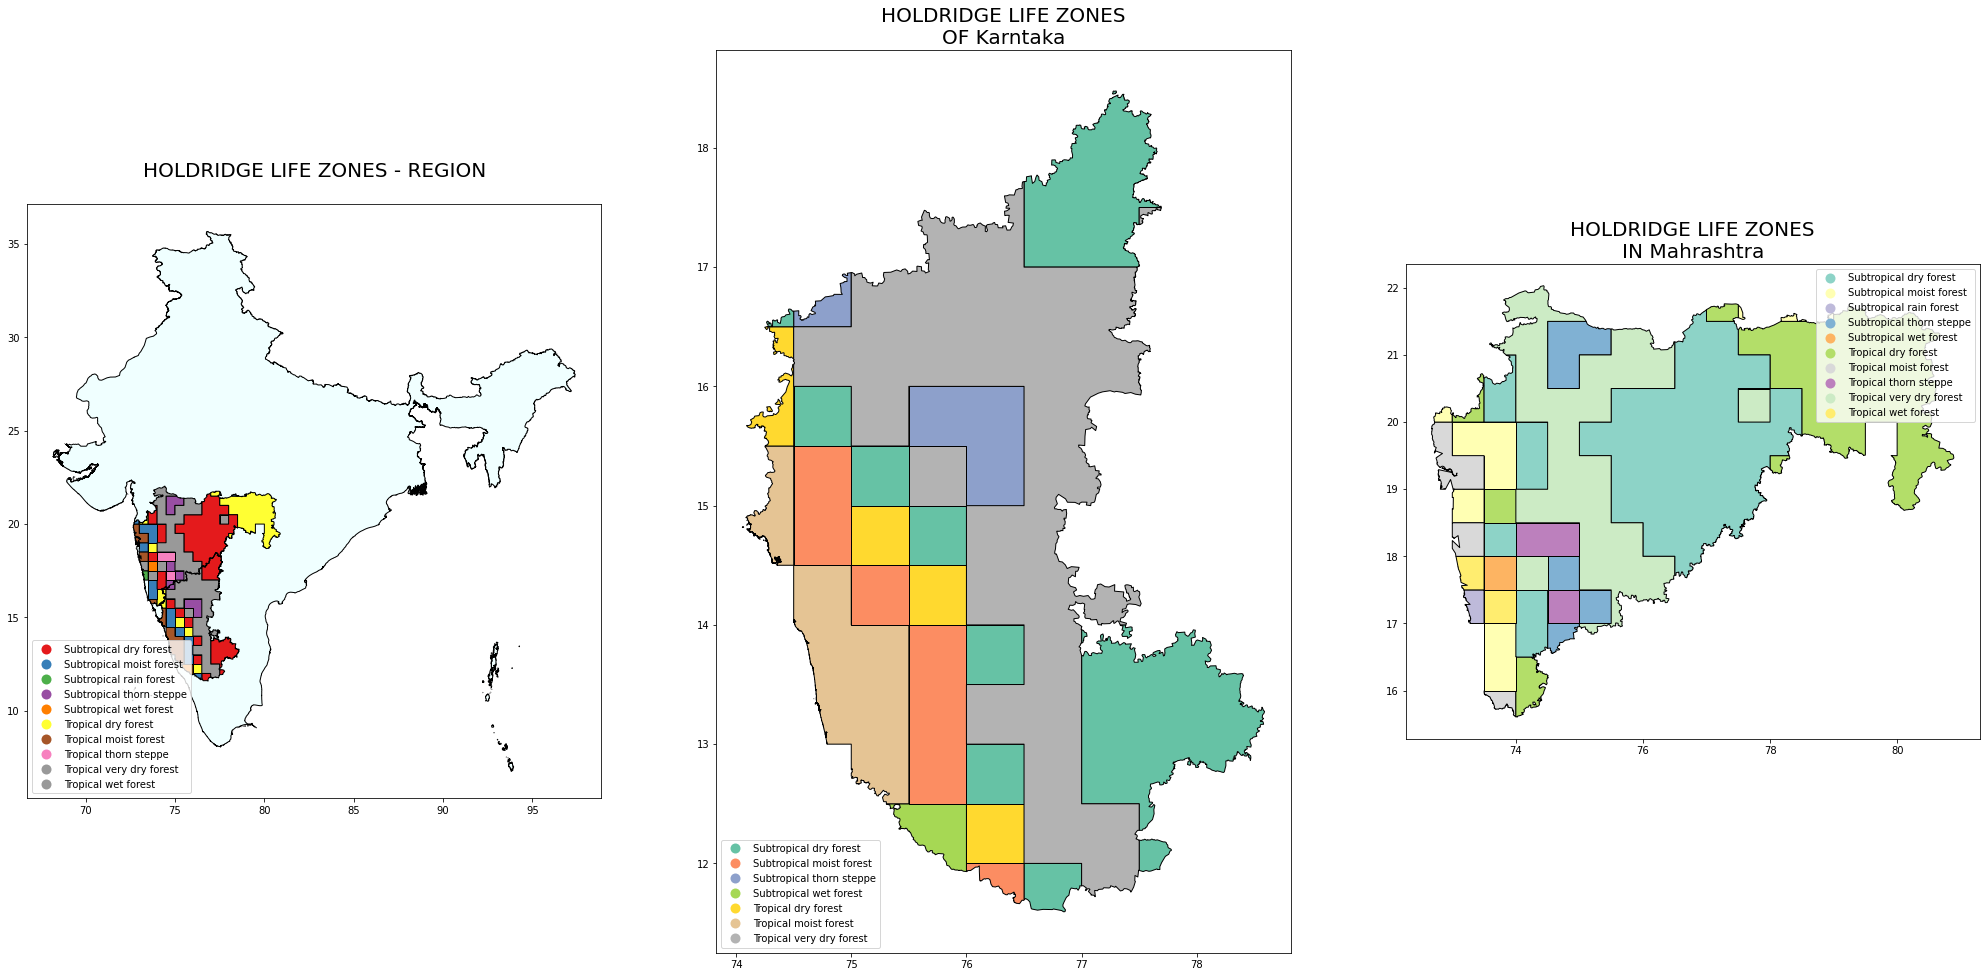

In [68]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(35,20))

# first map axes[0]
axes[0].set_title('HOLDRIDGE LIFE ZONES - REGION\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='azure', edgecolor='black')
regionsHoldridge_df.plot(ax=axes[0], column='desc', cmap='Set1', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('HOLDRIDGE LIFE ZONES\nOF Karntaka', fontsize=20)
knHoldridge_df.plot(ax=axes[1], column='desc', cmap='Set2', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('HOLDRIDGE LIFE ZONES\nIN Mahrashtra', fontsize=20)
mhHoldridge_df.plot(ax=axes[2], column='desc', cmap='Set3', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})
plt.show()

In [69]:
#Agro Ecological Zones

In [70]:
# All Agro Ecological Zones dataset
agroEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'

# download the data with request
agroEco_req = requests.get(agroEco).content

# load the json with geopandas
agroEco_df = gpd.read_file(io.StringIO(agroEco_req.decode('utf-8')))
agroEco_df.set_crs(epsg=4326, inplace=True)

print('Global Agro Ecological Zones dataset has %2d rows and %2d columns.' %(agroEco_df.shape[0], agroEco_df.shape[1]))

Global Agro Ecological Zones dataset has 116675 rows and  2 columns.


In [71]:
# fixing the data
values = {'1': 'Wheat', '2': 'Rice', '3': 'Maize', '4': 'Sorghum', '5': 'Millet', 
          '6': 'Other cereals', '7': 'Tubers', '8': 'Roots', '9': 'Sugar beet', 
          '10': 'Sugarcane', '11': 'Pulses', '12': 'Soybean', '13': 'Rape', 
          '14': 'Sunflower', '15': 'Groundnut', '16': 'Oil Palm', '17': 'Olive', 
          '18': 'Cotton', '19': 'Cash 1', '20': 'Vegetables', '21': 'Cash 2', 
          '22': 'Fodder', '23': 'Residual'}

# standardizing column names
agroEco_df.columns = agroEco_df.columns.str.lower()

# renaming class_name
agroEco_df.value = agroEco_df.value.astype('str').replace(values)

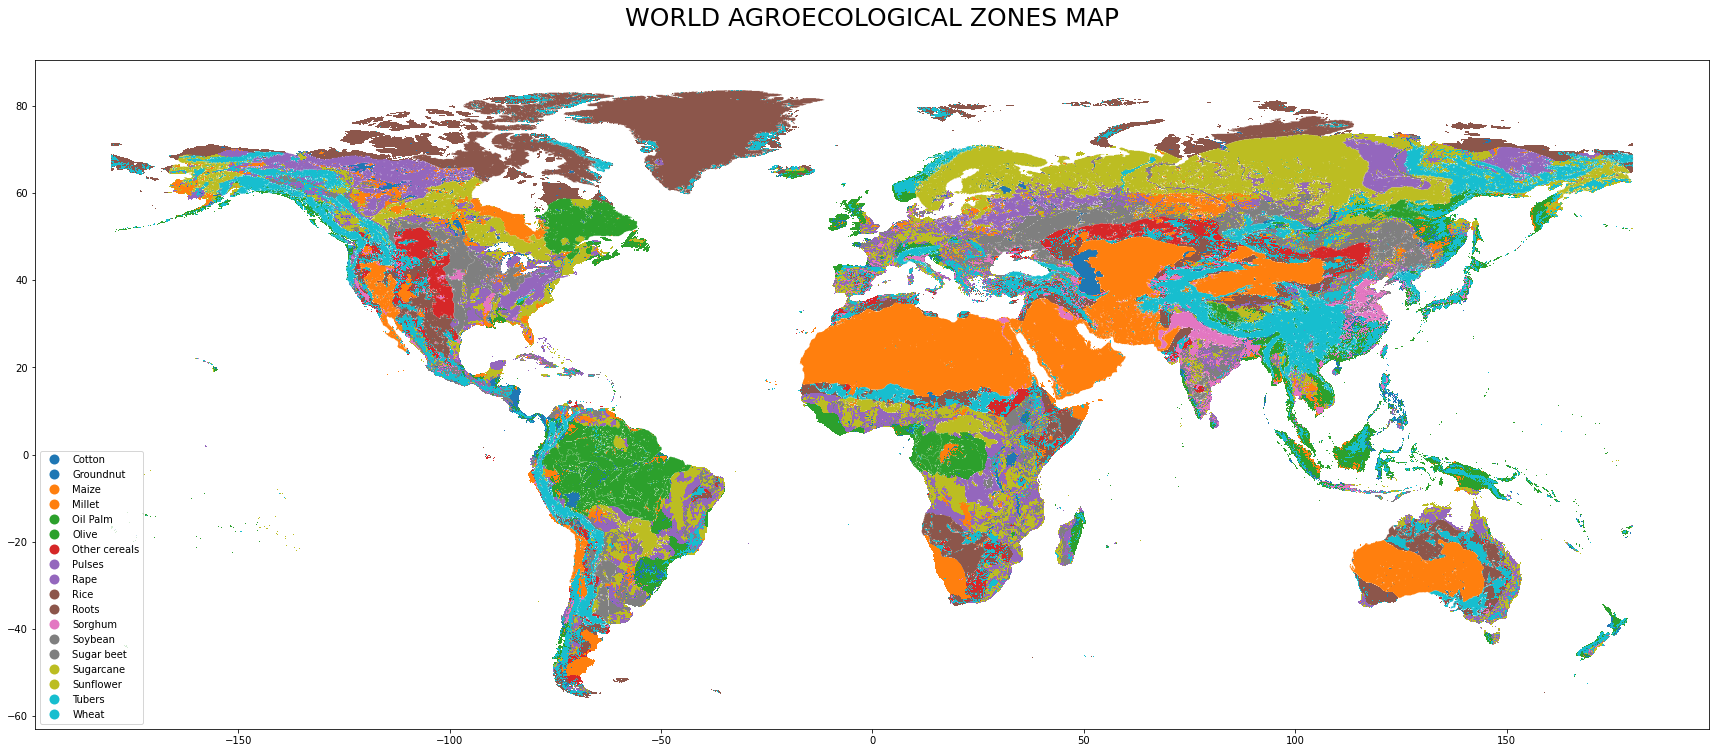

In [72]:
# plotting the map
ax = agroEco_df.plot(figsize = (30,15), column = 'value',
                     legend= True, legend_kwds= {'loc': 'lower left'})
ax.set_title('WORLD AGROECOLOGICAL ZONES MAP\n', fontsize=25)
plt.show()

In [73]:
# creating dataframe
asiaagroEco_df = agroEco_df.clip(asia_df)
asiaagroEco_df = asiaagroEco_df.reset_index(drop=True)

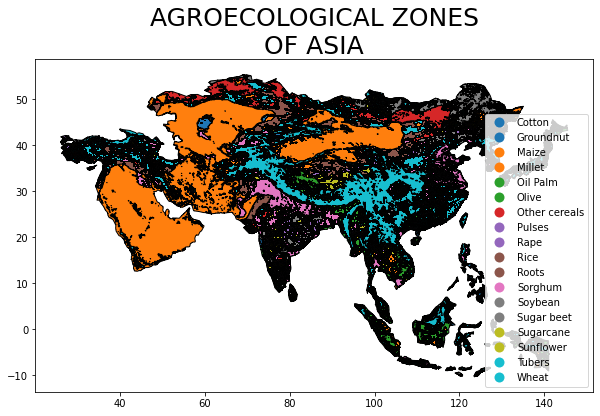

In [74]:
# Plotting in the maps
ax = asiaagroEco_df.plot(figsize=(10,15), edgecolor='black', column = 'value', cmap='tab10',
                                    legend= True, legend_kwds={'loc': 'lower right'})
ax.set_title('AGROECOLOGICAL ZONES\nOF ASIA', fontsize=25)
plt.show()

In [75]:
# creating dataframe
indiaagroEco_df = agroEco_df.clip(boundary_df)
indiaagroEco_df = indiaagroEco_df.reset_index(drop=True)

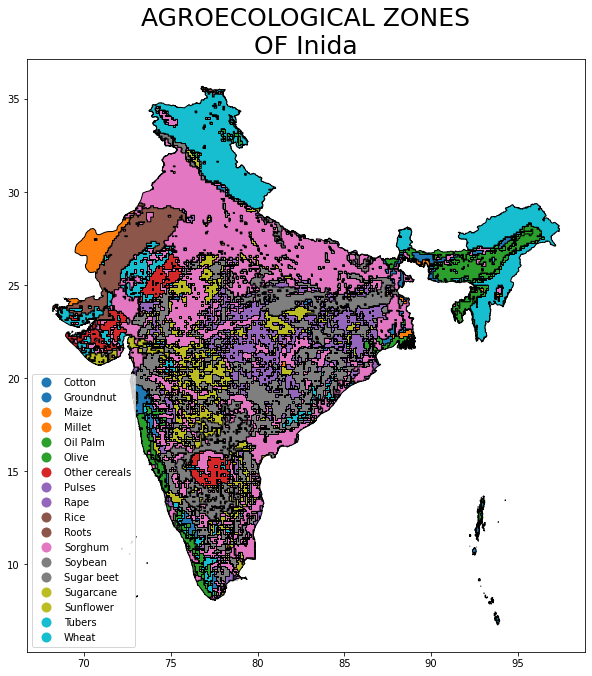

In [76]:
# Plotting in the maps
ax = indiaagroEco_df.plot(figsize=(10,15), edgecolor='black', column = 'value', cmap='tab10',
                                    legend= True, legend_kwds={'loc': 'lower left'})
ax.set_title('AGROECOLOGICAL ZONES\nOF Inida', fontsize=25)
plt.show()

In [77]:
# creating dataframe
knagroEco_df = agroEco_df.clip(knBoundary_df)
knagroEco_df = knagroEco_df.reset_index(drop=True)
mhagroEco_df = agroEco_df.clip(mhBoundary_df)
mhagroEco_df = mhagroEco_df.reset_index(drop=True)

In [78]:
# Using pandas to concatenate the dataframes.
regionsagroEco_df = pd.concat([mhagroEco_df, knagroEco_df], ignore_index=True)

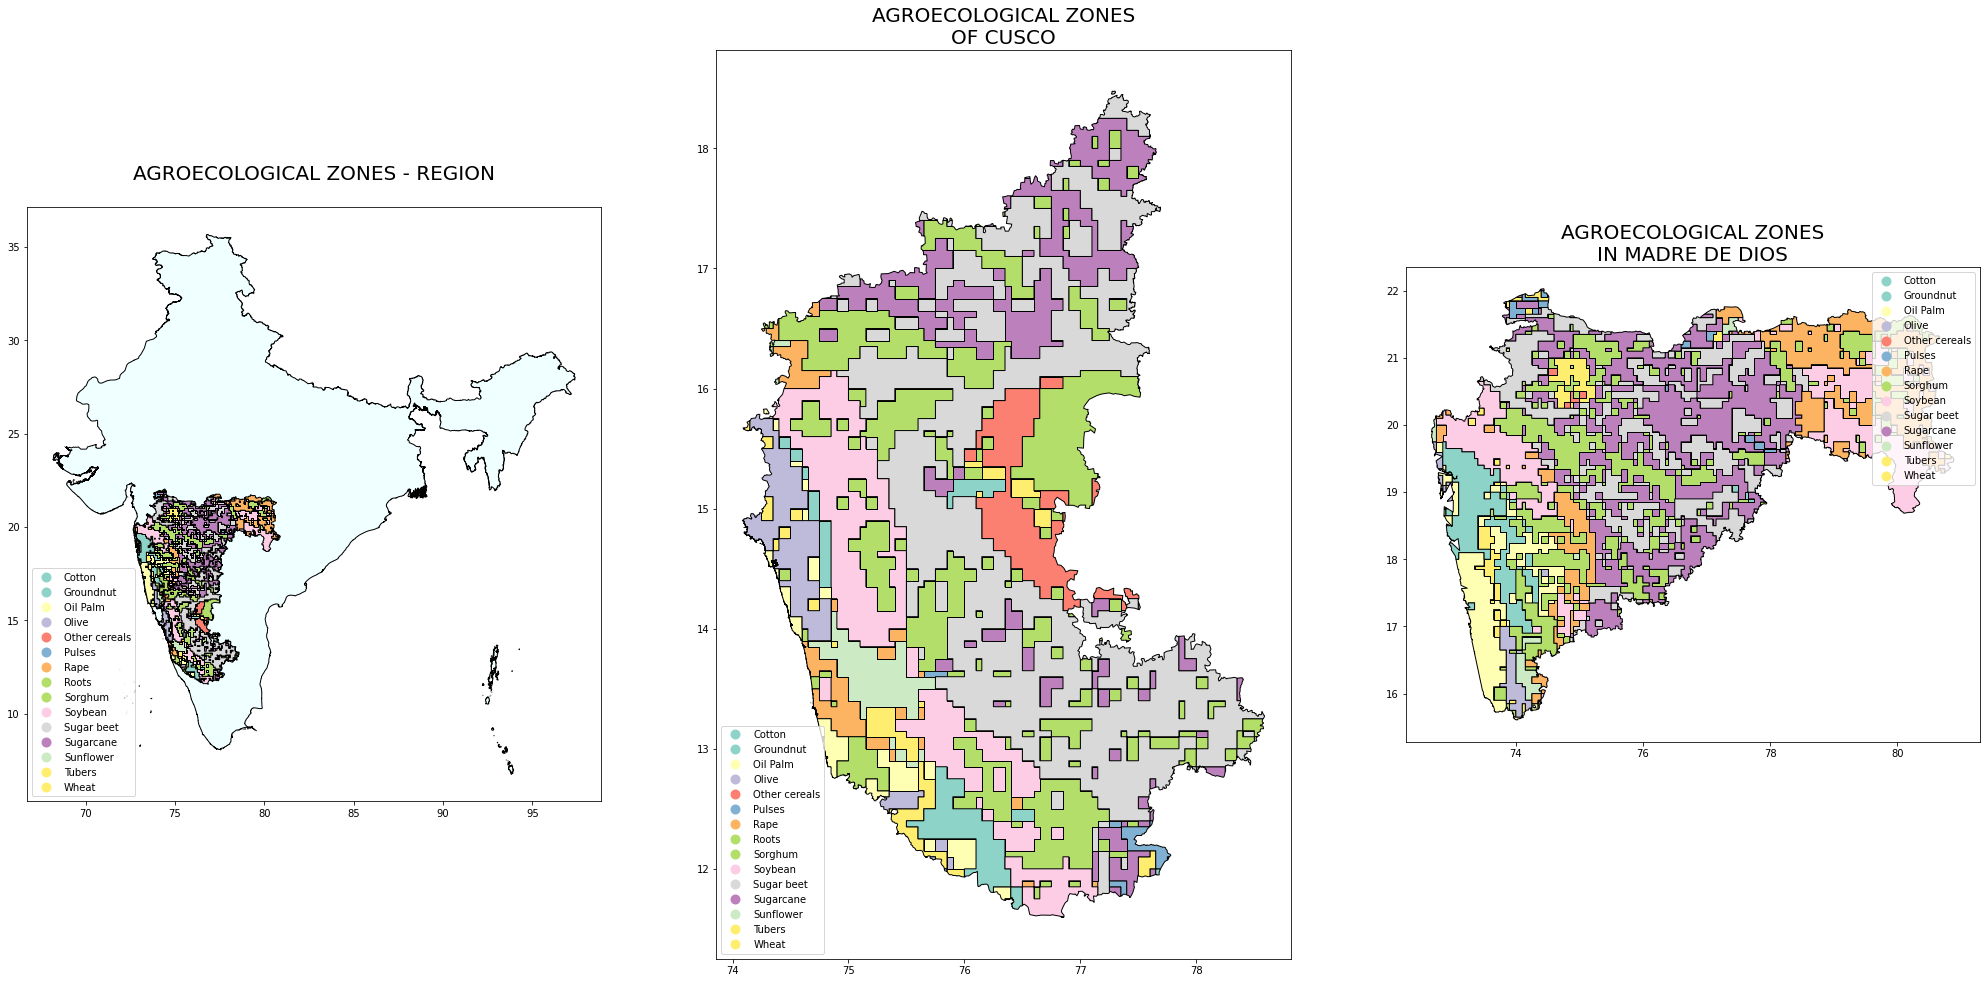

In [79]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(35,20))

# first map axes[0]
axes[0].set_title('AGROECOLOGICAL ZONES - REGION\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='azure', edgecolor='black')
regionsagroEco_df.plot(ax=axes[0], column='value', cmap='Set3', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('AGROECOLOGICAL ZONES\nOF CUSCO', fontsize=20)
knagroEco_df.plot(ax=axes[1], column='value', cmap='Set3', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('AGROECOLOGICAL ZONES\nIN MADRE DE DIOS', fontsize=20)
mhagroEco_df.plot(ax=axes[2], column='value', cmap='Set3', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})
plt.show()

In [1]:
# Climate Zones dataset
climate = 'https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'

# download the data with request
climate_req = requests.get(climate).content

# load the json with geopandas
climate_df = gpd.read_file(io.StringIO(climate_req.decode('utf-8')))
climate_df.set_crs(epsg=4326, inplace=True)

# standardizing column names
climate_df.columns = climate_df.columns.str.lower()

print('World Climate Zones dataset has %2d rows and %2d columns.' %(climate_df.shape[0], climate_df.shape[1]))

NameError: ignored

In [ ]:
# Replacing the data that was in codes
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}


# renaming class_name
climate_df.class_name = climate_df.class_name.astype('str').replace(classification)

# removing oceans
climate_df =  climate_df.loc[climate_df.class_name != '0']

In [ ]:
# plotting the map
ax = climate_df.plot(figsize = (30,15), column = 'class_name', legend= True, 
                     legend_kwds= {'loc': 'lower left'})
ax.set_title('WORLD CLIMATE ZONE MAP\n', fontsize=25)
plt.show()

In [ ]:
# creating dataframe
asiaClimate_df = climate_df.clip(asia_df)
asiaClimate_df = asiaClimate_df.reset_index(drop=True)